# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

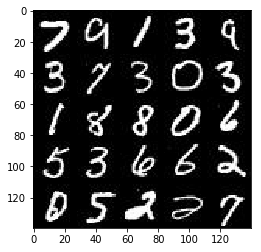

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

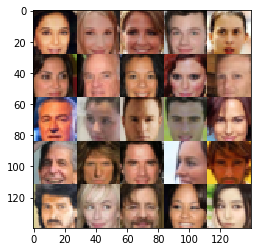

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, None,name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [72]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.1
    keep = 0.8
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        #x1 = tf.layers.conv2d(images, 56, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.nn.dropout(relu1,keep_prob = keep)
        # 14x14x56
        
        #x2 = tf.layers.conv2d(relu1, 112, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.nn.dropout(relu2,keep_prob = keep)
        # 7x17x112
        
        #x3 = tf.layers.conv2d(relu2, 224, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.nn.dropout(relu3,keep_prob = keep)
        
        #If 4 layers needed
        #x4 = tf.layers.conv2d(relu3, 512, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        #bn4 = tf.layers.batch_normalization(x4, training=True)
        #relu4 = tf.maximum(alpha * bn4, bn4)
        #relu4 = tf.nn.dropout(relu4,keep_prob = keep)
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out,logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [56]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha=0.1
    
    reuse = not is_train #Answer from forum
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        #x1 = tf.layers.dense(z, 4*4*448)

        
   
        # Output layer
        ###logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #28x28x3 now

        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # 2048
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1,keep_prob = 0.5)
        #print(x1)
        # 2x2x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,keep_prob = 0.5)
        #print(x2)
        # 7x7x256 now

        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,keep_prob = 0.5)
        #print(x3)# 14x14x128 now
        
        #Generator model should be larger than discriminator
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.nn.dropout(x4,keep_prob = 0.5)
        #print(x4)# 28x28x64 now
                
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x5 now

        out = tf.tanh(logits) 
        #print(out)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [57]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.1
    #reuse = not is_train #Answer from forum
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    #d_loss = tf.ones_like(d_loss) * (1 - smooth) #Try one-sided label smothing - actually, it's done above
     
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [58]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    #Control dependencies missed out of DGAN lesson
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS) #Perhaps not accurate enough to cover all with the same 

    
    #with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    #d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    #g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    #Perhaps not precise enough to cover all with the same - so split for generator and discriminator - thanks to aj85 on forum

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [70]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    
    #model_inputs(image_width, image_height, image_channels, z_dim)
    #return inputs_real, inputs_z, learning_rate
    #Note lr to make sure the actual learning rate hyperparameter is used. Could use _
    print_every = 10
    show_every = 100
    
    train_loss_d = 0
    train_loss_g = 0
    
    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2], data_shape[3], z_dim)
    # Could also use = model_inputs(*data_shape[1:4], z_dim) - but simpler is more readable
    
    #model_loss(input_real, input_z, out_channel_dim)
    #return d_loss, g_loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    #model_opt(d_loss, g_loss, learning_rate, beta1)
    #return d_train_opt, g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    ##sample_z = np.random.uniform(-1, 1, size=(50, z_dim))

    ##samples, losses = [], []
    #steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                #Rescale images
                #batch_size*=2
                batch_images *= 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                # In DCGAN lesson, batch_images was x
                
                ##_ = sess.run(g_train_opt, feed_dict={input_z: batch_z, learning_rate: learning_rate, input_real: batch_images})
                
                            
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} Batch {}...".format(epoch_i + 1, epoch_count, steps),
                          #"Step {}...".format(1, steps),
                          "Discriminator Loss: {:.4f} ... ".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    #losses.append((train_loss_d, train_loss_g))                
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                    ##show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
        
        #Show at end
        show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
        
        #saver.save(sess, './checkpoints/generator.ckpt')

    #with open('samples.pkl', 'wb') as f:
        #pkl.dump(samples, f)
    
#    return losses, samples

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Batch 10... Discriminator Loss: 2.0247 ...  Generator Loss: 1.5123
Epoch 1/2 Batch 20... Discriminator Loss: 1.4941 ...  Generator Loss: 1.8487
Epoch 1/2 Batch 30... Discriminator Loss: 0.7395 ...  Generator Loss: 1.8988
Epoch 1/2 Batch 40... Discriminator Loss: 2.0675 ...  Generator Loss: 0.1968
Epoch 1/2 Batch 50... Discriminator Loss: 1.4339 ...  Generator Loss: 0.3873
Epoch 1/2 Batch 60... Discriminator Loss: 1.9396 ...  Generator Loss: 0.3358
Epoch 1/2 Batch 70... Discriminator Loss: 1.7030 ...  Generator Loss: 0.3747
Epoch 1/2 Batch 80... Discriminator Loss: 1.2725 ...  Generator Loss: 0.8063
Epoch 1/2 Batch 90... Discriminator Loss: 1.5890 ...  Generator Loss: 0.4469
Epoch 1/2 Batch 100... Discriminator Loss: 0.9895 ...  Generator Loss: 0.7812


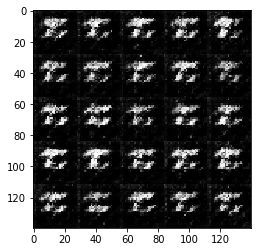

Epoch 1/2 Batch 110... Discriminator Loss: 1.0107 ...  Generator Loss: 1.3173
Epoch 1/2 Batch 120... Discriminator Loss: 0.6773 ...  Generator Loss: 2.3574
Epoch 1/2 Batch 130... Discriminator Loss: 1.2031 ...  Generator Loss: 0.5711
Epoch 1/2 Batch 140... Discriminator Loss: 1.0121 ...  Generator Loss: 1.7263
Epoch 1/2 Batch 150... Discriminator Loss: 1.0737 ...  Generator Loss: 1.3278
Epoch 1/2 Batch 160... Discriminator Loss: 1.1354 ...  Generator Loss: 0.7994
Epoch 1/2 Batch 170... Discriminator Loss: 1.2991 ...  Generator Loss: 0.9161
Epoch 1/2 Batch 180... Discriminator Loss: 1.3185 ...  Generator Loss: 0.7325
Epoch 1/2 Batch 190... Discriminator Loss: 1.6137 ...  Generator Loss: 0.5134
Epoch 1/2 Batch 200... Discriminator Loss: 1.4619 ...  Generator Loss: 0.8027


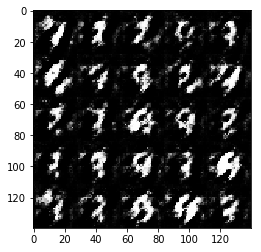

Epoch 1/2 Batch 210... Discriminator Loss: 1.4457 ...  Generator Loss: 0.5483
Epoch 1/2 Batch 220... Discriminator Loss: 1.2210 ...  Generator Loss: 1.4290
Epoch 1/2 Batch 230... Discriminator Loss: 1.1407 ...  Generator Loss: 0.9208
Epoch 1/2 Batch 240... Discriminator Loss: 1.1158 ...  Generator Loss: 0.6867
Epoch 1/2 Batch 250... Discriminator Loss: 0.9142 ...  Generator Loss: 1.4027
Epoch 1/2 Batch 260... Discriminator Loss: 0.9682 ...  Generator Loss: 1.4867
Epoch 1/2 Batch 270... Discriminator Loss: 1.2905 ...  Generator Loss: 0.8105
Epoch 1/2 Batch 280... Discriminator Loss: 1.2393 ...  Generator Loss: 1.2158
Epoch 1/2 Batch 290... Discriminator Loss: 1.5695 ...  Generator Loss: 2.0321
Epoch 1/2 Batch 300... Discriminator Loss: 1.0672 ...  Generator Loss: 0.8513


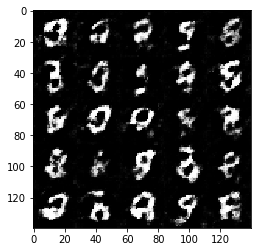

Epoch 1/2 Batch 310... Discriminator Loss: 1.3178 ...  Generator Loss: 2.4659
Epoch 1/2 Batch 320... Discriminator Loss: 1.5245 ...  Generator Loss: 1.8933
Epoch 1/2 Batch 330... Discriminator Loss: 1.2882 ...  Generator Loss: 1.1886
Epoch 1/2 Batch 340... Discriminator Loss: 1.5474 ...  Generator Loss: 0.4012
Epoch 1/2 Batch 350... Discriminator Loss: 1.0333 ...  Generator Loss: 1.0863
Epoch 1/2 Batch 360... Discriminator Loss: 1.4990 ...  Generator Loss: 0.9978
Epoch 1/2 Batch 370... Discriminator Loss: 1.2868 ...  Generator Loss: 1.1559
Epoch 1/2 Batch 380... Discriminator Loss: 1.3142 ...  Generator Loss: 1.4823
Epoch 1/2 Batch 390... Discriminator Loss: 1.1790 ...  Generator Loss: 0.6485
Epoch 1/2 Batch 400... Discriminator Loss: 1.2985 ...  Generator Loss: 0.6689


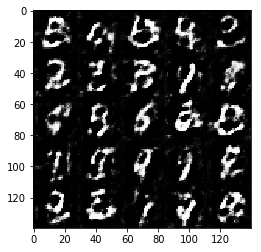

Epoch 1/2 Batch 410... Discriminator Loss: 1.2809 ...  Generator Loss: 1.3654
Epoch 1/2 Batch 420... Discriminator Loss: 1.2922 ...  Generator Loss: 0.8612
Epoch 1/2 Batch 430... Discriminator Loss: 1.1014 ...  Generator Loss: 0.9294
Epoch 1/2 Batch 440... Discriminator Loss: 1.0911 ...  Generator Loss: 1.8131
Epoch 1/2 Batch 450... Discriminator Loss: 1.3199 ...  Generator Loss: 1.5464
Epoch 1/2 Batch 460... Discriminator Loss: 1.2145 ...  Generator Loss: 0.9715
Epoch 1/2 Batch 470... Discriminator Loss: 1.3940 ...  Generator Loss: 0.4394
Epoch 1/2 Batch 480... Discriminator Loss: 1.1713 ...  Generator Loss: 0.6211
Epoch 1/2 Batch 490... Discriminator Loss: 1.2624 ...  Generator Loss: 0.5332
Epoch 1/2 Batch 500... Discriminator Loss: 1.1258 ...  Generator Loss: 1.0978


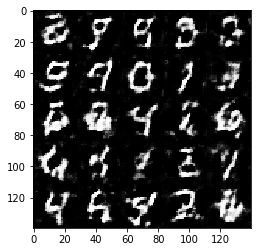

Epoch 1/2 Batch 510... Discriminator Loss: 1.1194 ...  Generator Loss: 1.5587
Epoch 1/2 Batch 520... Discriminator Loss: 1.1541 ...  Generator Loss: 0.9522
Epoch 1/2 Batch 530... Discriminator Loss: 1.6412 ...  Generator Loss: 0.3320
Epoch 1/2 Batch 540... Discriminator Loss: 1.1215 ...  Generator Loss: 0.7227
Epoch 1/2 Batch 550... Discriminator Loss: 1.2283 ...  Generator Loss: 1.1289
Epoch 1/2 Batch 560... Discriminator Loss: 1.2217 ...  Generator Loss: 1.8506
Epoch 1/2 Batch 570... Discriminator Loss: 1.2706 ...  Generator Loss: 1.0735
Epoch 1/2 Batch 580... Discriminator Loss: 1.2373 ...  Generator Loss: 1.5858
Epoch 1/2 Batch 590... Discriminator Loss: 1.2071 ...  Generator Loss: 1.0601
Epoch 1/2 Batch 600... Discriminator Loss: 1.1532 ...  Generator Loss: 1.2824


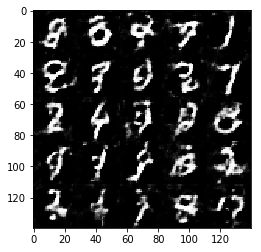

Epoch 1/2 Batch 610... Discriminator Loss: 1.0581 ...  Generator Loss: 1.0798
Epoch 1/2 Batch 620... Discriminator Loss: 1.2610 ...  Generator Loss: 1.3411
Epoch 1/2 Batch 630... Discriminator Loss: 1.1881 ...  Generator Loss: 0.8321
Epoch 1/2 Batch 640... Discriminator Loss: 1.2274 ...  Generator Loss: 1.1967
Epoch 1/2 Batch 650... Discriminator Loss: 1.2878 ...  Generator Loss: 1.5518
Epoch 1/2 Batch 660... Discriminator Loss: 1.1016 ...  Generator Loss: 1.0546
Epoch 1/2 Batch 670... Discriminator Loss: 1.6899 ...  Generator Loss: 0.4564
Epoch 1/2 Batch 680... Discriminator Loss: 1.0482 ...  Generator Loss: 0.8553
Epoch 1/2 Batch 690... Discriminator Loss: 1.0774 ...  Generator Loss: 1.1740
Epoch 1/2 Batch 700... Discriminator Loss: 1.1207 ...  Generator Loss: 0.8730


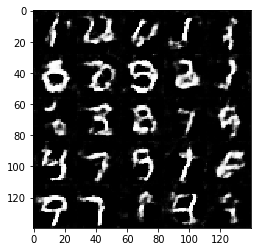

Epoch 1/2 Batch 710... Discriminator Loss: 1.0546 ...  Generator Loss: 1.3276
Epoch 1/2 Batch 720... Discriminator Loss: 1.0810 ...  Generator Loss: 1.1538
Epoch 1/2 Batch 730... Discriminator Loss: 1.0530 ...  Generator Loss: 1.4802
Epoch 1/2 Batch 740... Discriminator Loss: 1.2887 ...  Generator Loss: 1.1611
Epoch 1/2 Batch 750... Discriminator Loss: 1.1766 ...  Generator Loss: 1.0631
Epoch 1/2 Batch 760... Discriminator Loss: 1.0496 ...  Generator Loss: 0.7426
Epoch 1/2 Batch 770... Discriminator Loss: 1.0967 ...  Generator Loss: 0.5851
Epoch 1/2 Batch 780... Discriminator Loss: 1.2183 ...  Generator Loss: 1.3760
Epoch 1/2 Batch 790... Discriminator Loss: 1.2082 ...  Generator Loss: 1.1338
Epoch 1/2 Batch 800... Discriminator Loss: 1.2058 ...  Generator Loss: 0.7028


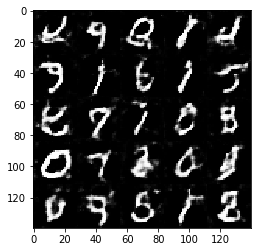

Epoch 1/2 Batch 810... Discriminator Loss: 1.0709 ...  Generator Loss: 0.8120
Epoch 1/2 Batch 820... Discriminator Loss: 1.3008 ...  Generator Loss: 0.5848
Epoch 1/2 Batch 830... Discriminator Loss: 1.1088 ...  Generator Loss: 0.6076
Epoch 1/2 Batch 840... Discriminator Loss: 0.9284 ...  Generator Loss: 1.0924
Epoch 1/2 Batch 850... Discriminator Loss: 1.1012 ...  Generator Loss: 1.0276
Epoch 1/2 Batch 860... Discriminator Loss: 1.2109 ...  Generator Loss: 0.5744
Epoch 1/2 Batch 870... Discriminator Loss: 1.1401 ...  Generator Loss: 0.9965
Epoch 1/2 Batch 880... Discriminator Loss: 1.1238 ...  Generator Loss: 0.8896
Epoch 1/2 Batch 890... Discriminator Loss: 1.0066 ...  Generator Loss: 1.2989
Epoch 1/2 Batch 900... Discriminator Loss: 1.0398 ...  Generator Loss: 0.9504


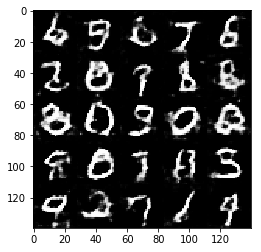

Epoch 1/2 Batch 910... Discriminator Loss: 1.0118 ...  Generator Loss: 1.4566
Epoch 1/2 Batch 920... Discriminator Loss: 1.1770 ...  Generator Loss: 1.7012
Epoch 1/2 Batch 930... Discriminator Loss: 1.0749 ...  Generator Loss: 0.8549
Epoch 1/2 Batch 940... Discriminator Loss: 1.0307 ...  Generator Loss: 0.9634
Epoch 1/2 Batch 950... Discriminator Loss: 1.4119 ...  Generator Loss: 0.7778
Epoch 1/2 Batch 960... Discriminator Loss: 1.2861 ...  Generator Loss: 0.5219
Epoch 1/2 Batch 970... Discriminator Loss: 1.2955 ...  Generator Loss: 0.6094
Epoch 1/2 Batch 980... Discriminator Loss: 1.1860 ...  Generator Loss: 0.9008
Epoch 1/2 Batch 990... Discriminator Loss: 1.0529 ...  Generator Loss: 1.0944
Epoch 1/2 Batch 1000... Discriminator Loss: 1.1693 ...  Generator Loss: 1.4522


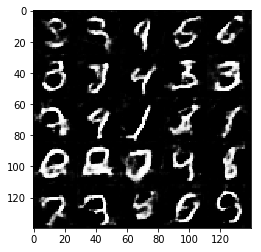

Epoch 1/2 Batch 1010... Discriminator Loss: 1.1163 ...  Generator Loss: 1.5087
Epoch 1/2 Batch 1020... Discriminator Loss: 1.1719 ...  Generator Loss: 0.6045
Epoch 1/2 Batch 1030... Discriminator Loss: 1.1439 ...  Generator Loss: 0.8383
Epoch 1/2 Batch 1040... Discriminator Loss: 1.0603 ...  Generator Loss: 1.6240
Epoch 1/2 Batch 1050... Discriminator Loss: 1.1951 ...  Generator Loss: 1.1943
Epoch 1/2 Batch 1060... Discriminator Loss: 1.1757 ...  Generator Loss: 1.5737
Epoch 1/2 Batch 1070... Discriminator Loss: 1.1833 ...  Generator Loss: 0.8421
Epoch 1/2 Batch 1080... Discriminator Loss: 1.3145 ...  Generator Loss: 1.2120
Epoch 1/2 Batch 1090... Discriminator Loss: 1.0168 ...  Generator Loss: 0.9164
Epoch 1/2 Batch 1100... Discriminator Loss: 1.1812 ...  Generator Loss: 0.7488


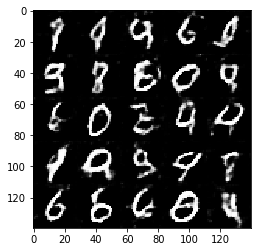

Epoch 1/2 Batch 1110... Discriminator Loss: 1.3018 ...  Generator Loss: 0.4794
Epoch 1/2 Batch 1120... Discriminator Loss: 1.1582 ...  Generator Loss: 0.7139
Epoch 1/2 Batch 1130... Discriminator Loss: 1.2046 ...  Generator Loss: 0.5973
Epoch 1/2 Batch 1140... Discriminator Loss: 1.2875 ...  Generator Loss: 1.2924
Epoch 1/2 Batch 1150... Discriminator Loss: 1.1008 ...  Generator Loss: 1.7083
Epoch 1/2 Batch 1160... Discriminator Loss: 1.0946 ...  Generator Loss: 0.9517
Epoch 1/2 Batch 1170... Discriminator Loss: 0.9873 ...  Generator Loss: 1.4266
Epoch 1/2 Batch 1180... Discriminator Loss: 1.1514 ...  Generator Loss: 1.4455
Epoch 1/2 Batch 1190... Discriminator Loss: 0.9949 ...  Generator Loss: 1.3829
Epoch 1/2 Batch 1200... Discriminator Loss: 1.1318 ...  Generator Loss: 0.6730


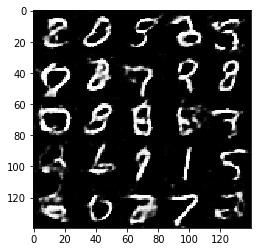

Epoch 1/2 Batch 1210... Discriminator Loss: 1.1666 ...  Generator Loss: 1.6035
Epoch 1/2 Batch 1220... Discriminator Loss: 1.0659 ...  Generator Loss: 1.2222
Epoch 1/2 Batch 1230... Discriminator Loss: 1.1950 ...  Generator Loss: 1.3553
Epoch 1/2 Batch 1240... Discriminator Loss: 1.3620 ...  Generator Loss: 1.1304
Epoch 1/2 Batch 1250... Discriminator Loss: 1.1262 ...  Generator Loss: 0.8409
Epoch 1/2 Batch 1260... Discriminator Loss: 1.1152 ...  Generator Loss: 0.9203
Epoch 1/2 Batch 1270... Discriminator Loss: 1.1511 ...  Generator Loss: 0.8193
Epoch 1/2 Batch 1280... Discriminator Loss: 1.1047 ...  Generator Loss: 0.7151
Epoch 1/2 Batch 1290... Discriminator Loss: 1.0596 ...  Generator Loss: 0.8923
Epoch 1/2 Batch 1300... Discriminator Loss: 1.1392 ...  Generator Loss: 0.7021


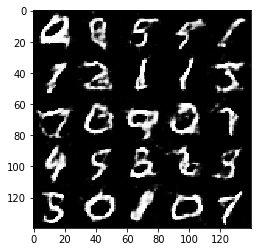

Epoch 1/2 Batch 1310... Discriminator Loss: 1.1816 ...  Generator Loss: 0.7155
Epoch 1/2 Batch 1320... Discriminator Loss: 1.0668 ...  Generator Loss: 0.9533
Epoch 1/2 Batch 1330... Discriminator Loss: 1.2678 ...  Generator Loss: 0.5687
Epoch 1/2 Batch 1340... Discriminator Loss: 1.2353 ...  Generator Loss: 0.8888
Epoch 1/2 Batch 1350... Discriminator Loss: 0.9902 ...  Generator Loss: 1.1958
Epoch 1/2 Batch 1360... Discriminator Loss: 1.1161 ...  Generator Loss: 0.7027
Epoch 1/2 Batch 1370... Discriminator Loss: 1.0201 ...  Generator Loss: 0.8917
Epoch 1/2 Batch 1380... Discriminator Loss: 0.9429 ...  Generator Loss: 0.9584
Epoch 1/2 Batch 1390... Discriminator Loss: 1.2407 ...  Generator Loss: 1.6242
Epoch 1/2 Batch 1400... Discriminator Loss: 1.0263 ...  Generator Loss: 1.2045


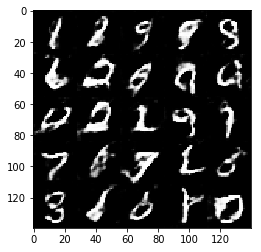

Epoch 1/2 Batch 1410... Discriminator Loss: 1.0124 ...  Generator Loss: 0.7433
Epoch 1/2 Batch 1420... Discriminator Loss: 1.0303 ...  Generator Loss: 1.0028
Epoch 1/2 Batch 1430... Discriminator Loss: 1.1525 ...  Generator Loss: 1.5897
Epoch 1/2 Batch 1440... Discriminator Loss: 1.1567 ...  Generator Loss: 1.1785
Epoch 1/2 Batch 1450... Discriminator Loss: 0.9627 ...  Generator Loss: 1.3007
Epoch 1/2 Batch 1460... Discriminator Loss: 1.0221 ...  Generator Loss: 1.3082
Epoch 1/2 Batch 1470... Discriminator Loss: 0.8895 ...  Generator Loss: 0.7137
Epoch 1/2 Batch 1480... Discriminator Loss: 1.3659 ...  Generator Loss: 0.5360
Epoch 1/2 Batch 1490... Discriminator Loss: 1.1873 ...  Generator Loss: 0.6235
Epoch 1/2 Batch 1500... Discriminator Loss: 0.8060 ...  Generator Loss: 0.8501


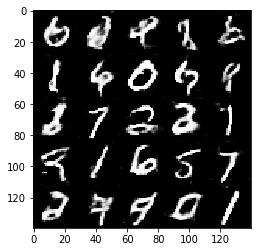

Epoch 1/2 Batch 1510... Discriminator Loss: 1.0733 ...  Generator Loss: 1.1544
Epoch 1/2 Batch 1520... Discriminator Loss: 0.8715 ...  Generator Loss: 1.0694
Epoch 1/2 Batch 1530... Discriminator Loss: 1.0709 ...  Generator Loss: 0.8473
Epoch 1/2 Batch 1540... Discriminator Loss: 1.0528 ...  Generator Loss: 0.6278
Epoch 1/2 Batch 1550... Discriminator Loss: 1.0505 ...  Generator Loss: 0.7482
Epoch 1/2 Batch 1560... Discriminator Loss: 1.0066 ...  Generator Loss: 1.1481
Epoch 1/2 Batch 1570... Discriminator Loss: 1.1933 ...  Generator Loss: 1.3111
Epoch 1/2 Batch 1580... Discriminator Loss: 1.0808 ...  Generator Loss: 1.5471
Epoch 1/2 Batch 1590... Discriminator Loss: 1.0751 ...  Generator Loss: 1.4874
Epoch 1/2 Batch 1600... Discriminator Loss: 1.3006 ...  Generator Loss: 1.2791


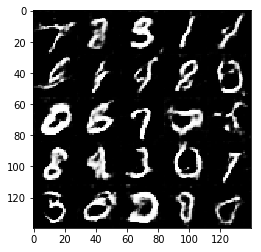

Epoch 1/2 Batch 1610... Discriminator Loss: 1.1388 ...  Generator Loss: 1.0013
Epoch 1/2 Batch 1620... Discriminator Loss: 0.8517 ...  Generator Loss: 1.1697
Epoch 1/2 Batch 1630... Discriminator Loss: 1.0322 ...  Generator Loss: 1.4831
Epoch 1/2 Batch 1640... Discriminator Loss: 0.9572 ...  Generator Loss: 0.8816
Epoch 1/2 Batch 1650... Discriminator Loss: 1.1114 ...  Generator Loss: 0.7042
Epoch 1/2 Batch 1660... Discriminator Loss: 1.0475 ...  Generator Loss: 1.5596
Epoch 1/2 Batch 1670... Discriminator Loss: 1.3281 ...  Generator Loss: 0.5268
Epoch 1/2 Batch 1680... Discriminator Loss: 1.0778 ...  Generator Loss: 1.1740
Epoch 1/2 Batch 1690... Discriminator Loss: 1.2104 ...  Generator Loss: 1.5306
Epoch 1/2 Batch 1700... Discriminator Loss: 1.2019 ...  Generator Loss: 0.8801


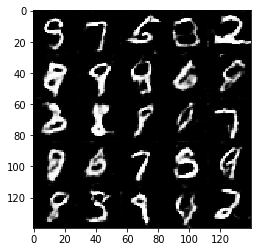

Epoch 1/2 Batch 1710... Discriminator Loss: 1.1223 ...  Generator Loss: 1.7267
Epoch 1/2 Batch 1720... Discriminator Loss: 0.9518 ...  Generator Loss: 0.7260
Epoch 1/2 Batch 1730... Discriminator Loss: 0.7641 ...  Generator Loss: 0.7510
Epoch 1/2 Batch 1740... Discriminator Loss: 0.9316 ...  Generator Loss: 1.1099
Epoch 1/2 Batch 1750... Discriminator Loss: 0.8650 ...  Generator Loss: 1.1137
Epoch 1/2 Batch 1760... Discriminator Loss: 0.9721 ...  Generator Loss: 1.1980
Epoch 1/2 Batch 1770... Discriminator Loss: 0.8820 ...  Generator Loss: 1.2556
Epoch 1/2 Batch 1780... Discriminator Loss: 1.0425 ...  Generator Loss: 1.4821
Epoch 1/2 Batch 1790... Discriminator Loss: 1.2938 ...  Generator Loss: 1.8762
Epoch 1/2 Batch 1800... Discriminator Loss: 1.0454 ...  Generator Loss: 0.6632


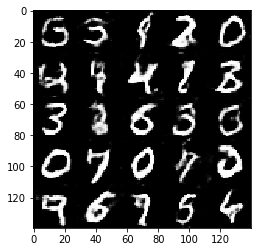

Epoch 1/2 Batch 1810... Discriminator Loss: 1.2605 ...  Generator Loss: 0.7388
Epoch 1/2 Batch 1820... Discriminator Loss: 1.1290 ...  Generator Loss: 0.9147
Epoch 1/2 Batch 1830... Discriminator Loss: 1.2053 ...  Generator Loss: 1.8011
Epoch 1/2 Batch 1840... Discriminator Loss: 0.8766 ...  Generator Loss: 0.8725
Epoch 1/2 Batch 1850... Discriminator Loss: 0.7701 ...  Generator Loss: 1.6861
Epoch 1/2 Batch 1860... Discriminator Loss: 1.0626 ...  Generator Loss: 0.9028
Epoch 1/2 Batch 1870... Discriminator Loss: 1.0995 ...  Generator Loss: 1.2801
Epoch 2/2 Batch 10... Discriminator Loss: 0.9371 ...  Generator Loss: 0.7385
Epoch 2/2 Batch 20... Discriminator Loss: 0.8284 ...  Generator Loss: 1.0534
Epoch 2/2 Batch 30... Discriminator Loss: 1.3573 ...  Generator Loss: 0.4968
Epoch 2/2 Batch 40... Discriminator Loss: 0.8265 ...  Generator Loss: 0.8942
Epoch 2/2 Batch 50... Discriminator Loss: 0.9481 ...  Generator Loss: 0.6772
Epoch 2/2 Batch 60... Discriminator Loss: 0.9008 ...  Generato

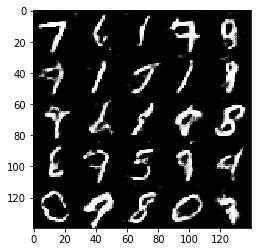

Epoch 2/2 Batch 110... Discriminator Loss: 1.0227 ...  Generator Loss: 0.8792
Epoch 2/2 Batch 120... Discriminator Loss: 1.0881 ...  Generator Loss: 1.5402
Epoch 2/2 Batch 130... Discriminator Loss: 1.1111 ...  Generator Loss: 0.9317
Epoch 2/2 Batch 140... Discriminator Loss: 0.9458 ...  Generator Loss: 0.8529
Epoch 2/2 Batch 150... Discriminator Loss: 1.0655 ...  Generator Loss: 0.7333
Epoch 2/2 Batch 160... Discriminator Loss: 0.8592 ...  Generator Loss: 1.0368
Epoch 2/2 Batch 170... Discriminator Loss: 1.1588 ...  Generator Loss: 0.8363
Epoch 2/2 Batch 180... Discriminator Loss: 0.9642 ...  Generator Loss: 1.5583
Epoch 2/2 Batch 190... Discriminator Loss: 0.9217 ...  Generator Loss: 0.7822
Epoch 2/2 Batch 200... Discriminator Loss: 0.8994 ...  Generator Loss: 0.9596


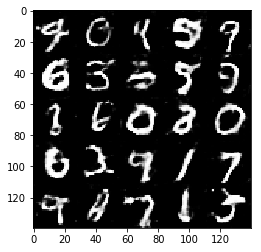

Epoch 2/2 Batch 210... Discriminator Loss: 0.7686 ...  Generator Loss: 0.8837
Epoch 2/2 Batch 220... Discriminator Loss: 0.7584 ...  Generator Loss: 0.9909
Epoch 2/2 Batch 230... Discriminator Loss: 1.1425 ...  Generator Loss: 2.3368
Epoch 2/2 Batch 240... Discriminator Loss: 1.0268 ...  Generator Loss: 0.9024
Epoch 2/2 Batch 250... Discriminator Loss: 0.8722 ...  Generator Loss: 0.8339
Epoch 2/2 Batch 260... Discriminator Loss: 1.0113 ...  Generator Loss: 1.0608
Epoch 2/2 Batch 270... Discriminator Loss: 0.8046 ...  Generator Loss: 1.0055
Epoch 2/2 Batch 280... Discriminator Loss: 0.7610 ...  Generator Loss: 1.1946
Epoch 2/2 Batch 290... Discriminator Loss: 0.8598 ...  Generator Loss: 1.7031
Epoch 2/2 Batch 300... Discriminator Loss: 1.0048 ...  Generator Loss: 1.1892


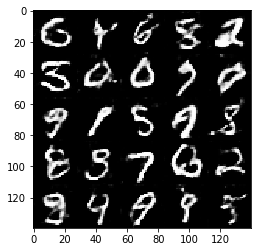

Epoch 2/2 Batch 310... Discriminator Loss: 0.8599 ...  Generator Loss: 0.9032
Epoch 2/2 Batch 320... Discriminator Loss: 1.0424 ...  Generator Loss: 1.4466
Epoch 2/2 Batch 330... Discriminator Loss: 0.9385 ...  Generator Loss: 1.6011
Epoch 2/2 Batch 340... Discriminator Loss: 0.7593 ...  Generator Loss: 1.2451
Epoch 2/2 Batch 350... Discriminator Loss: 0.9325 ...  Generator Loss: 2.3376
Epoch 2/2 Batch 360... Discriminator Loss: 0.9722 ...  Generator Loss: 1.4202
Epoch 2/2 Batch 370... Discriminator Loss: 0.9091 ...  Generator Loss: 0.9231
Epoch 2/2 Batch 380... Discriminator Loss: 0.8060 ...  Generator Loss: 1.1247
Epoch 2/2 Batch 390... Discriminator Loss: 0.9643 ...  Generator Loss: 0.5565
Epoch 2/2 Batch 400... Discriminator Loss: 0.8691 ...  Generator Loss: 0.8916


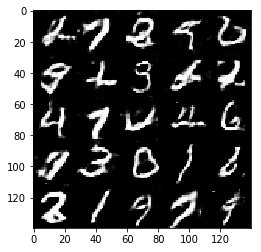

Epoch 2/2 Batch 410... Discriminator Loss: 0.9638 ...  Generator Loss: 1.6166
Epoch 2/2 Batch 420... Discriminator Loss: 1.0717 ...  Generator Loss: 1.1905
Epoch 2/2 Batch 430... Discriminator Loss: 0.8701 ...  Generator Loss: 0.8949
Epoch 2/2 Batch 440... Discriminator Loss: 0.8368 ...  Generator Loss: 1.4432
Epoch 2/2 Batch 450... Discriminator Loss: 0.9237 ...  Generator Loss: 0.7825
Epoch 2/2 Batch 460... Discriminator Loss: 1.1121 ...  Generator Loss: 0.9214
Epoch 2/2 Batch 470... Discriminator Loss: 1.4657 ...  Generator Loss: 0.5445
Epoch 2/2 Batch 480... Discriminator Loss: 0.8910 ...  Generator Loss: 1.0284
Epoch 2/2 Batch 490... Discriminator Loss: 0.8938 ...  Generator Loss: 1.1634
Epoch 2/2 Batch 500... Discriminator Loss: 0.9219 ...  Generator Loss: 0.7485


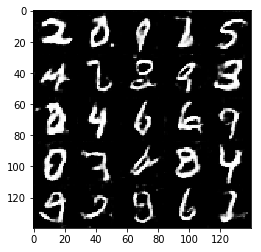

Epoch 2/2 Batch 510... Discriminator Loss: 0.9987 ...  Generator Loss: 2.4737
Epoch 2/2 Batch 520... Discriminator Loss: 1.3534 ...  Generator Loss: 1.8348
Epoch 2/2 Batch 530... Discriminator Loss: 0.7673 ...  Generator Loss: 1.5503
Epoch 2/2 Batch 540... Discriminator Loss: 0.8765 ...  Generator Loss: 1.4810
Epoch 2/2 Batch 550... Discriminator Loss: 1.1237 ...  Generator Loss: 1.8808
Epoch 2/2 Batch 560... Discriminator Loss: 0.8106 ...  Generator Loss: 1.1358
Epoch 2/2 Batch 570... Discriminator Loss: 0.8291 ...  Generator Loss: 1.2240
Epoch 2/2 Batch 580... Discriminator Loss: 1.0198 ...  Generator Loss: 2.1588
Epoch 2/2 Batch 590... Discriminator Loss: 0.7227 ...  Generator Loss: 1.1707
Epoch 2/2 Batch 600... Discriminator Loss: 0.9307 ...  Generator Loss: 1.6215


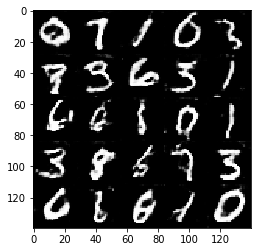

Epoch 2/2 Batch 610... Discriminator Loss: 0.8048 ...  Generator Loss: 1.3756
Epoch 2/2 Batch 620... Discriminator Loss: 0.9195 ...  Generator Loss: 1.8846
Epoch 2/2 Batch 630... Discriminator Loss: 0.8687 ...  Generator Loss: 2.0539
Epoch 2/2 Batch 640... Discriminator Loss: 1.7283 ...  Generator Loss: 2.1836
Epoch 2/2 Batch 650... Discriminator Loss: 0.9382 ...  Generator Loss: 1.1468
Epoch 2/2 Batch 660... Discriminator Loss: 0.8919 ...  Generator Loss: 1.4736
Epoch 2/2 Batch 670... Discriminator Loss: 0.8674 ...  Generator Loss: 1.4672
Epoch 2/2 Batch 680... Discriminator Loss: 0.8830 ...  Generator Loss: 1.3841
Epoch 2/2 Batch 690... Discriminator Loss: 1.0938 ...  Generator Loss: 0.9359
Epoch 2/2 Batch 700... Discriminator Loss: 0.8022 ...  Generator Loss: 1.1671


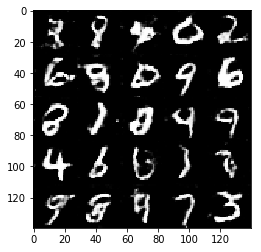

Epoch 2/2 Batch 710... Discriminator Loss: 0.7484 ...  Generator Loss: 1.8087
Epoch 2/2 Batch 720... Discriminator Loss: 1.0097 ...  Generator Loss: 0.6478
Epoch 2/2 Batch 730... Discriminator Loss: 1.7489 ...  Generator Loss: 3.2200
Epoch 2/2 Batch 740... Discriminator Loss: 1.1134 ...  Generator Loss: 1.3115
Epoch 2/2 Batch 750... Discriminator Loss: 0.7898 ...  Generator Loss: 1.3295
Epoch 2/2 Batch 760... Discriminator Loss: 0.6654 ...  Generator Loss: 1.0461
Epoch 2/2 Batch 770... Discriminator Loss: 0.7881 ...  Generator Loss: 1.5650
Epoch 2/2 Batch 780... Discriminator Loss: 1.2748 ...  Generator Loss: 0.5523
Epoch 2/2 Batch 790... Discriminator Loss: 0.8616 ...  Generator Loss: 1.3139
Epoch 2/2 Batch 800... Discriminator Loss: 0.6416 ...  Generator Loss: 1.6691


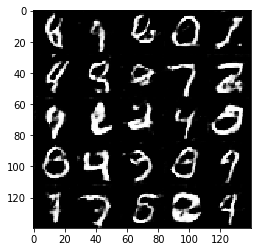

Epoch 2/2 Batch 810... Discriminator Loss: 0.5529 ...  Generator Loss: 1.2403
Epoch 2/2 Batch 820... Discriminator Loss: 0.6577 ...  Generator Loss: 1.7472
Epoch 2/2 Batch 830... Discriminator Loss: 0.9013 ...  Generator Loss: 1.0018
Epoch 2/2 Batch 840... Discriminator Loss: 0.9946 ...  Generator Loss: 0.8754
Epoch 2/2 Batch 850... Discriminator Loss: 0.5631 ...  Generator Loss: 1.3759
Epoch 2/2 Batch 860... Discriminator Loss: 0.7876 ...  Generator Loss: 1.0268
Epoch 2/2 Batch 870... Discriminator Loss: 0.5933 ...  Generator Loss: 1.8452
Epoch 2/2 Batch 880... Discriminator Loss: 0.7390 ...  Generator Loss: 1.6591
Epoch 2/2 Batch 890... Discriminator Loss: 0.7053 ...  Generator Loss: 1.4942
Epoch 2/2 Batch 900... Discriminator Loss: 0.6241 ...  Generator Loss: 1.6495


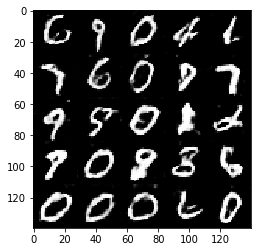

Epoch 2/2 Batch 910... Discriminator Loss: 0.6479 ...  Generator Loss: 1.8167
Epoch 2/2 Batch 920... Discriminator Loss: 0.6837 ...  Generator Loss: 0.8751
Epoch 2/2 Batch 930... Discriminator Loss: 0.6850 ...  Generator Loss: 1.6916
Epoch 2/2 Batch 940... Discriminator Loss: 0.6537 ...  Generator Loss: 1.8145
Epoch 2/2 Batch 950... Discriminator Loss: 1.0561 ...  Generator Loss: 0.6607
Epoch 2/2 Batch 960... Discriminator Loss: 0.6950 ...  Generator Loss: 1.9082
Epoch 2/2 Batch 970... Discriminator Loss: 1.9197 ...  Generator Loss: 0.2389
Epoch 2/2 Batch 980... Discriminator Loss: 0.9770 ...  Generator Loss: 1.7885
Epoch 2/2 Batch 990... Discriminator Loss: 0.8598 ...  Generator Loss: 1.1675
Epoch 2/2 Batch 1000... Discriminator Loss: 1.1671 ...  Generator Loss: 1.5355


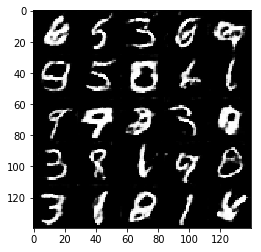

Epoch 2/2 Batch 1010... Discriminator Loss: 0.5744 ...  Generator Loss: 1.2239
Epoch 2/2 Batch 1020... Discriminator Loss: 0.7262 ...  Generator Loss: 1.6938
Epoch 2/2 Batch 1030... Discriminator Loss: 0.9376 ...  Generator Loss: 1.1011
Epoch 2/2 Batch 1040... Discriminator Loss: 0.6114 ...  Generator Loss: 0.8885
Epoch 2/2 Batch 1050... Discriminator Loss: 0.6391 ...  Generator Loss: 1.6896
Epoch 2/2 Batch 1060... Discriminator Loss: 0.8024 ...  Generator Loss: 1.1335
Epoch 2/2 Batch 1070... Discriminator Loss: 0.9901 ...  Generator Loss: 0.6735
Epoch 2/2 Batch 1080... Discriminator Loss: 0.7063 ...  Generator Loss: 0.9483
Epoch 2/2 Batch 1090... Discriminator Loss: 0.7314 ...  Generator Loss: 1.0379
Epoch 2/2 Batch 1100... Discriminator Loss: 1.0789 ...  Generator Loss: 2.0984


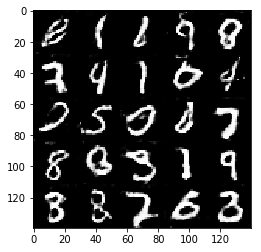

Epoch 2/2 Batch 1110... Discriminator Loss: 0.9291 ...  Generator Loss: 0.7702
Epoch 2/2 Batch 1120... Discriminator Loss: 0.7039 ...  Generator Loss: 1.4183
Epoch 2/2 Batch 1130... Discriminator Loss: 1.3928 ...  Generator Loss: 0.4837
Epoch 2/2 Batch 1140... Discriminator Loss: 0.7565 ...  Generator Loss: 1.9695
Epoch 2/2 Batch 1150... Discriminator Loss: 0.6947 ...  Generator Loss: 1.6187
Epoch 2/2 Batch 1160... Discriminator Loss: 0.6737 ...  Generator Loss: 1.4768
Epoch 2/2 Batch 1170... Discriminator Loss: 0.8814 ...  Generator Loss: 2.2584
Epoch 2/2 Batch 1180... Discriminator Loss: 0.6281 ...  Generator Loss: 1.8301
Epoch 2/2 Batch 1190... Discriminator Loss: 0.8600 ...  Generator Loss: 1.8179
Epoch 2/2 Batch 1200... Discriminator Loss: 0.6835 ...  Generator Loss: 1.9366


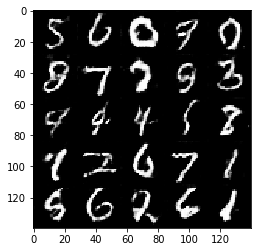

Epoch 2/2 Batch 1210... Discriminator Loss: 0.9279 ...  Generator Loss: 3.0301
Epoch 2/2 Batch 1220... Discriminator Loss: 0.8049 ...  Generator Loss: 1.3237
Epoch 2/2 Batch 1230... Discriminator Loss: 0.6329 ...  Generator Loss: 1.0666
Epoch 2/2 Batch 1240... Discriminator Loss: 0.6034 ...  Generator Loss: 1.8386
Epoch 2/2 Batch 1250... Discriminator Loss: 0.5773 ...  Generator Loss: 1.2505
Epoch 2/2 Batch 1260... Discriminator Loss: 0.6561 ...  Generator Loss: 1.2710
Epoch 2/2 Batch 1270... Discriminator Loss: 0.8013 ...  Generator Loss: 1.4746
Epoch 2/2 Batch 1280... Discriminator Loss: 0.6370 ...  Generator Loss: 2.4192
Epoch 2/2 Batch 1290... Discriminator Loss: 0.6952 ...  Generator Loss: 2.2364
Epoch 2/2 Batch 1300... Discriminator Loss: 0.4841 ...  Generator Loss: 1.4241


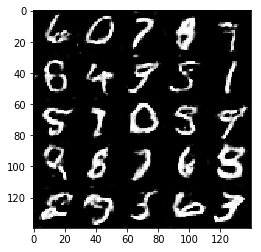

Epoch 2/2 Batch 1310... Discriminator Loss: 0.6779 ...  Generator Loss: 1.1623
Epoch 2/2 Batch 1320... Discriminator Loss: 0.6548 ...  Generator Loss: 1.1252
Epoch 2/2 Batch 1330... Discriminator Loss: 0.7161 ...  Generator Loss: 0.9606
Epoch 2/2 Batch 1340... Discriminator Loss: 0.5800 ...  Generator Loss: 1.3718
Epoch 2/2 Batch 1350... Discriminator Loss: 0.5986 ...  Generator Loss: 2.1717
Epoch 2/2 Batch 1360... Discriminator Loss: 0.5924 ...  Generator Loss: 1.6627
Epoch 2/2 Batch 1370... Discriminator Loss: 1.2506 ...  Generator Loss: 0.6078
Epoch 2/2 Batch 1380... Discriminator Loss: 0.5835 ...  Generator Loss: 0.9716
Epoch 2/2 Batch 1390... Discriminator Loss: 0.6584 ...  Generator Loss: 1.2095
Epoch 2/2 Batch 1400... Discriminator Loss: 0.5558 ...  Generator Loss: 2.4054


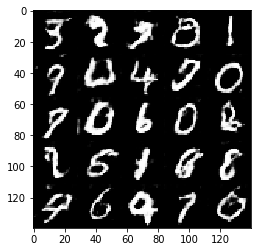

Epoch 2/2 Batch 1410... Discriminator Loss: 1.0015 ...  Generator Loss: 2.2969
Epoch 2/2 Batch 1420... Discriminator Loss: 0.6692 ...  Generator Loss: 1.8479
Epoch 2/2 Batch 1430... Discriminator Loss: 0.6759 ...  Generator Loss: 1.4180
Epoch 2/2 Batch 1440... Discriminator Loss: 1.3677 ...  Generator Loss: 0.5017
Epoch 2/2 Batch 1450... Discriminator Loss: 0.6107 ...  Generator Loss: 1.6715
Epoch 2/2 Batch 1460... Discriminator Loss: 0.6534 ...  Generator Loss: 0.6997
Epoch 2/2 Batch 1470... Discriminator Loss: 0.4269 ...  Generator Loss: 2.2938
Epoch 2/2 Batch 1480... Discriminator Loss: 0.8891 ...  Generator Loss: 1.7344
Epoch 2/2 Batch 1490... Discriminator Loss: 0.5552 ...  Generator Loss: 1.5918
Epoch 2/2 Batch 1500... Discriminator Loss: 0.5881 ...  Generator Loss: 0.9623


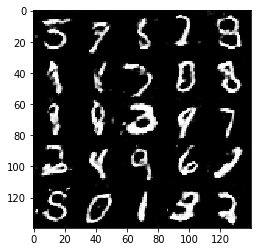

Epoch 2/2 Batch 1510... Discriminator Loss: 1.1753 ...  Generator Loss: 3.5713
Epoch 2/2 Batch 1520... Discriminator Loss: 0.6872 ...  Generator Loss: 1.7470
Epoch 2/2 Batch 1530... Discriminator Loss: 0.5613 ...  Generator Loss: 1.7411
Epoch 2/2 Batch 1540... Discriminator Loss: 0.5446 ...  Generator Loss: 2.1062
Epoch 2/2 Batch 1550... Discriminator Loss: 0.6960 ...  Generator Loss: 1.3138
Epoch 2/2 Batch 1560... Discriminator Loss: 0.5988 ...  Generator Loss: 1.5708
Epoch 2/2 Batch 1570... Discriminator Loss: 0.4347 ...  Generator Loss: 1.5580
Epoch 2/2 Batch 1580... Discriminator Loss: 0.5063 ...  Generator Loss: 1.7424
Epoch 2/2 Batch 1590... Discriminator Loss: 0.8811 ...  Generator Loss: 0.9659
Epoch 2/2 Batch 1600... Discriminator Loss: 0.5004 ...  Generator Loss: 1.1116


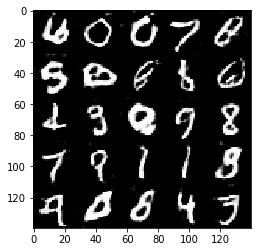

Epoch 2/2 Batch 1610... Discriminator Loss: 0.3955 ...  Generator Loss: 1.6800
Epoch 2/2 Batch 1620... Discriminator Loss: 0.5996 ...  Generator Loss: 1.8880
Epoch 2/2 Batch 1630... Discriminator Loss: 0.4557 ...  Generator Loss: 2.0340
Epoch 2/2 Batch 1640... Discriminator Loss: 0.7467 ...  Generator Loss: 1.0536
Epoch 2/2 Batch 1650... Discriminator Loss: 0.4359 ...  Generator Loss: 1.5513
Epoch 2/2 Batch 1660... Discriminator Loss: 0.5663 ...  Generator Loss: 1.5154
Epoch 2/2 Batch 1670... Discriminator Loss: 0.5791 ...  Generator Loss: 2.3268
Epoch 2/2 Batch 1680... Discriminator Loss: 0.6575 ...  Generator Loss: 2.0836
Epoch 2/2 Batch 1690... Discriminator Loss: 0.6189 ...  Generator Loss: 1.6142
Epoch 2/2 Batch 1700... Discriminator Loss: 0.5095 ...  Generator Loss: 1.7755


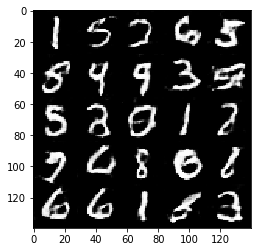

Epoch 2/2 Batch 1710... Discriminator Loss: 0.7102 ...  Generator Loss: 1.1489
Epoch 2/2 Batch 1720... Discriminator Loss: 0.5517 ...  Generator Loss: 1.8878
Epoch 2/2 Batch 1730... Discriminator Loss: 1.3735 ...  Generator Loss: 0.4514
Epoch 2/2 Batch 1740... Discriminator Loss: 0.3844 ...  Generator Loss: 1.4813
Epoch 2/2 Batch 1750... Discriminator Loss: 0.8563 ...  Generator Loss: 2.5319
Epoch 2/2 Batch 1760... Discriminator Loss: 0.5707 ...  Generator Loss: 2.4651
Epoch 2/2 Batch 1770... Discriminator Loss: 0.3169 ...  Generator Loss: 2.3766
Epoch 2/2 Batch 1780... Discriminator Loss: 0.5087 ...  Generator Loss: 1.8243
Epoch 2/2 Batch 1790... Discriminator Loss: 1.4361 ...  Generator Loss: 2.9293
Epoch 2/2 Batch 1800... Discriminator Loss: 0.4733 ...  Generator Loss: 0.9516


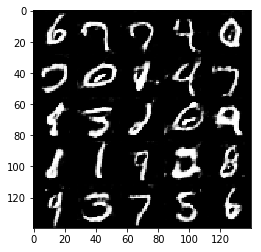

Epoch 2/2 Batch 1810... Discriminator Loss: 0.5993 ...  Generator Loss: 0.9985
Epoch 2/2 Batch 1820... Discriminator Loss: 0.5898 ...  Generator Loss: 0.9523
Epoch 2/2 Batch 1830... Discriminator Loss: 0.5374 ...  Generator Loss: 1.5120
Epoch 2/2 Batch 1840... Discriminator Loss: 0.5305 ...  Generator Loss: 1.7552
Epoch 2/2 Batch 1850... Discriminator Loss: 0.4320 ...  Generator Loss: 2.2172
Epoch 2/2 Batch 1860... Discriminator Loss: 0.5249 ...  Generator Loss: 2.6823
Epoch 2/2 Batch 1870... Discriminator Loss: 0.4807 ...  Generator Loss: 1.9084


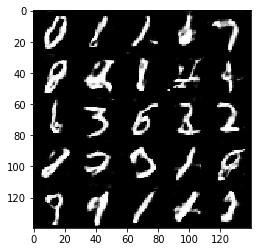

In [75]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Batch 10... Discriminator Loss: 0.8635 ...  Generator Loss: 1.1962
Epoch 1/1 Batch 20... Discriminator Loss: 1.0410 ...  Generator Loss: 3.2471
Epoch 1/1 Batch 30... Discriminator Loss: 1.1635 ...  Generator Loss: 3.5631
Epoch 1/1 Batch 40... Discriminator Loss: 0.5948 ...  Generator Loss: 3.2701
Epoch 1/1 Batch 50... Discriminator Loss: 0.3806 ...  Generator Loss: 4.2657
Epoch 1/1 Batch 60... Discriminator Loss: 1.0058 ...  Generator Loss: 2.6642
Epoch 1/1 Batch 70... Discriminator Loss: 1.1670 ...  Generator Loss: 2.3002
Epoch 1/1 Batch 80... Discriminator Loss: 0.9702 ...  Generator Loss: 3.2509
Epoch 1/1 Batch 90... Discriminator Loss: 0.4940 ...  Generator Loss: 2.2606
Epoch 1/1 Batch 100... Discriminator Loss: 1.0479 ...  Generator Loss: 0.5551


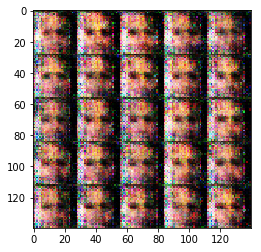

Epoch 1/1 Batch 110... Discriminator Loss: 0.2631 ...  Generator Loss: 1.9707
Epoch 1/1 Batch 120... Discriminator Loss: 0.6368 ...  Generator Loss: 1.3321
Epoch 1/1 Batch 130... Discriminator Loss: 1.0575 ...  Generator Loss: 1.3641
Epoch 1/1 Batch 140... Discriminator Loss: 0.9794 ...  Generator Loss: 4.0683
Epoch 1/1 Batch 150... Discriminator Loss: 0.3857 ...  Generator Loss: 2.0998
Epoch 1/1 Batch 160... Discriminator Loss: 0.4497 ...  Generator Loss: 1.9111
Epoch 1/1 Batch 170... Discriminator Loss: 0.3943 ...  Generator Loss: 2.5253
Epoch 1/1 Batch 180... Discriminator Loss: 0.2401 ...  Generator Loss: 3.1412
Epoch 1/1 Batch 190... Discriminator Loss: 1.3078 ...  Generator Loss: 5.6282
Epoch 1/1 Batch 200... Discriminator Loss: 0.5605 ...  Generator Loss: 1.5647


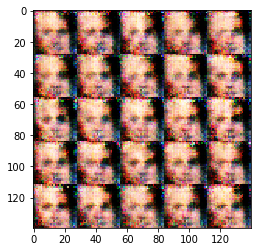

Epoch 1/1 Batch 210... Discriminator Loss: 0.6795 ...  Generator Loss: 1.5708
Epoch 1/1 Batch 220... Discriminator Loss: 0.3115 ...  Generator Loss: 2.0325
Epoch 1/1 Batch 230... Discriminator Loss: 0.3991 ...  Generator Loss: 2.5302
Epoch 1/1 Batch 240... Discriminator Loss: 1.3653 ...  Generator Loss: 0.3515
Epoch 1/1 Batch 250... Discriminator Loss: 1.2449 ...  Generator Loss: 0.7602
Epoch 1/1 Batch 260... Discriminator Loss: 1.2958 ...  Generator Loss: 0.5321
Epoch 1/1 Batch 270... Discriminator Loss: 1.0668 ...  Generator Loss: 0.6789
Epoch 1/1 Batch 280... Discriminator Loss: 0.7487 ...  Generator Loss: 0.8994
Epoch 1/1 Batch 290... Discriminator Loss: 1.0331 ...  Generator Loss: 1.2376
Epoch 1/1 Batch 300... Discriminator Loss: 1.2808 ...  Generator Loss: 1.6365


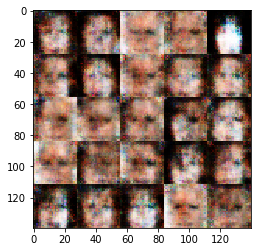

Epoch 1/1 Batch 310... Discriminator Loss: 1.0866 ...  Generator Loss: 1.0829
Epoch 1/1 Batch 320... Discriminator Loss: 1.5459 ...  Generator Loss: 1.1964
Epoch 1/1 Batch 330... Discriminator Loss: 1.7643 ...  Generator Loss: 1.7191
Epoch 1/1 Batch 340... Discriminator Loss: 1.1018 ...  Generator Loss: 1.6013
Epoch 1/1 Batch 350... Discriminator Loss: 1.2871 ...  Generator Loss: 1.6545
Epoch 1/1 Batch 360... Discriminator Loss: 1.2843 ...  Generator Loss: 1.0320
Epoch 1/1 Batch 370... Discriminator Loss: 1.4208 ...  Generator Loss: 1.1331
Epoch 1/1 Batch 380... Discriminator Loss: 1.2184 ...  Generator Loss: 0.8970
Epoch 1/1 Batch 390... Discriminator Loss: 1.3730 ...  Generator Loss: 1.0730
Epoch 1/1 Batch 400... Discriminator Loss: 1.2229 ...  Generator Loss: 0.8872


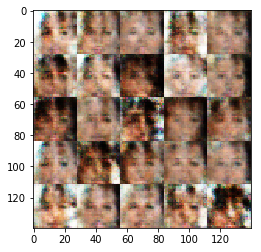

Epoch 1/1 Batch 410... Discriminator Loss: 1.6631 ...  Generator Loss: 0.4100
Epoch 1/1 Batch 420... Discriminator Loss: 1.4984 ...  Generator Loss: 0.4394
Epoch 1/1 Batch 430... Discriminator Loss: 1.2773 ...  Generator Loss: 0.6979
Epoch 1/1 Batch 440... Discriminator Loss: 1.2019 ...  Generator Loss: 1.2899
Epoch 1/1 Batch 450... Discriminator Loss: 1.1838 ...  Generator Loss: 1.0035
Epoch 1/1 Batch 460... Discriminator Loss: 1.2356 ...  Generator Loss: 0.9496
Epoch 1/1 Batch 470... Discriminator Loss: 1.3011 ...  Generator Loss: 0.7901
Epoch 1/1 Batch 480... Discriminator Loss: 1.4963 ...  Generator Loss: 0.8127
Epoch 1/1 Batch 490... Discriminator Loss: 1.2174 ...  Generator Loss: 0.7284
Epoch 1/1 Batch 500... Discriminator Loss: 1.4981 ...  Generator Loss: 0.4847


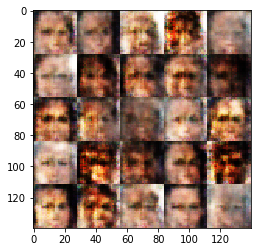

Epoch 1/1 Batch 510... Discriminator Loss: 1.1377 ...  Generator Loss: 0.7454
Epoch 1/1 Batch 520... Discriminator Loss: 1.1603 ...  Generator Loss: 0.9359
Epoch 1/1 Batch 530... Discriminator Loss: 1.3351 ...  Generator Loss: 0.6667
Epoch 1/1 Batch 540... Discriminator Loss: 1.2513 ...  Generator Loss: 1.2797
Epoch 1/1 Batch 550... Discriminator Loss: 1.3158 ...  Generator Loss: 0.7308
Epoch 1/1 Batch 560... Discriminator Loss: 1.1387 ...  Generator Loss: 0.7566
Epoch 1/1 Batch 570... Discriminator Loss: 1.2177 ...  Generator Loss: 1.0023
Epoch 1/1 Batch 580... Discriminator Loss: 1.4807 ...  Generator Loss: 0.5320
Epoch 1/1 Batch 590... Discriminator Loss: 1.0778 ...  Generator Loss: 0.9422
Epoch 1/1 Batch 600... Discriminator Loss: 1.4863 ...  Generator Loss: 0.8057


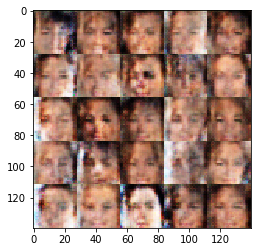

Epoch 1/1 Batch 610... Discriminator Loss: 1.3436 ...  Generator Loss: 0.7130
Epoch 1/1 Batch 620... Discriminator Loss: 1.3918 ...  Generator Loss: 1.0381
Epoch 1/1 Batch 630... Discriminator Loss: 1.0577 ...  Generator Loss: 0.9941
Epoch 1/1 Batch 640... Discriminator Loss: 1.3150 ...  Generator Loss: 0.8154
Epoch 1/1 Batch 650... Discriminator Loss: 1.2487 ...  Generator Loss: 0.8365
Epoch 1/1 Batch 660... Discriminator Loss: 1.1860 ...  Generator Loss: 0.8183
Epoch 1/1 Batch 670... Discriminator Loss: 1.3593 ...  Generator Loss: 1.2552
Epoch 1/1 Batch 680... Discriminator Loss: 1.2099 ...  Generator Loss: 0.8542
Epoch 1/1 Batch 690... Discriminator Loss: 1.3831 ...  Generator Loss: 0.9969
Epoch 1/1 Batch 700... Discriminator Loss: 1.2698 ...  Generator Loss: 0.9695


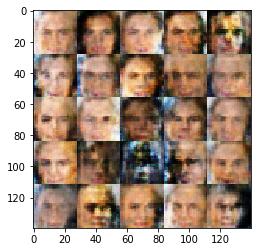

Epoch 1/1 Batch 710... Discriminator Loss: 1.4243 ...  Generator Loss: 0.6468
Epoch 1/1 Batch 720... Discriminator Loss: 1.4344 ...  Generator Loss: 0.6172
Epoch 1/1 Batch 730... Discriminator Loss: 1.2360 ...  Generator Loss: 0.8500
Epoch 1/1 Batch 740... Discriminator Loss: 1.2850 ...  Generator Loss: 1.0501
Epoch 1/1 Batch 750... Discriminator Loss: 1.2085 ...  Generator Loss: 0.8540
Epoch 1/1 Batch 760... Discriminator Loss: 1.2283 ...  Generator Loss: 0.9481
Epoch 1/1 Batch 770... Discriminator Loss: 1.3151 ...  Generator Loss: 0.9015
Epoch 1/1 Batch 780... Discriminator Loss: 1.2951 ...  Generator Loss: 0.7767
Epoch 1/1 Batch 790... Discriminator Loss: 1.5532 ...  Generator Loss: 0.6114
Epoch 1/1 Batch 800... Discriminator Loss: 1.3182 ...  Generator Loss: 1.0948


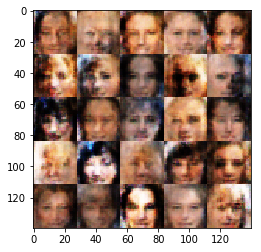

Epoch 1/1 Batch 810... Discriminator Loss: 1.3445 ...  Generator Loss: 0.7696
Epoch 1/1 Batch 820... Discriminator Loss: 1.2969 ...  Generator Loss: 0.7511
Epoch 1/1 Batch 830... Discriminator Loss: 1.2411 ...  Generator Loss: 0.9787
Epoch 1/1 Batch 840... Discriminator Loss: 1.4448 ...  Generator Loss: 0.8932
Epoch 1/1 Batch 850... Discriminator Loss: 1.5122 ...  Generator Loss: 0.4898
Epoch 1/1 Batch 860... Discriminator Loss: 1.1453 ...  Generator Loss: 0.8100
Epoch 1/1 Batch 870... Discriminator Loss: 1.4336 ...  Generator Loss: 0.7772
Epoch 1/1 Batch 880... Discriminator Loss: 1.1784 ...  Generator Loss: 0.6963
Epoch 1/1 Batch 890... Discriminator Loss: 1.4366 ...  Generator Loss: 0.6506
Epoch 1/1 Batch 900... Discriminator Loss: 1.3601 ...  Generator Loss: 0.9067


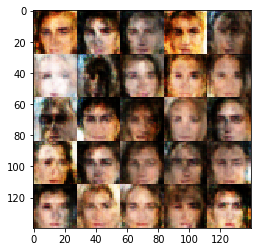

Epoch 1/1 Batch 910... Discriminator Loss: 1.3374 ...  Generator Loss: 0.6414
Epoch 1/1 Batch 920... Discriminator Loss: 1.3792 ...  Generator Loss: 0.7727
Epoch 1/1 Batch 930... Discriminator Loss: 1.3062 ...  Generator Loss: 0.3667
Epoch 1/1 Batch 940... Discriminator Loss: 1.2799 ...  Generator Loss: 1.0471
Epoch 1/1 Batch 950... Discriminator Loss: 1.2164 ...  Generator Loss: 0.6618
Epoch 1/1 Batch 960... Discriminator Loss: 1.4213 ...  Generator Loss: 0.9100
Epoch 1/1 Batch 970... Discriminator Loss: 1.2288 ...  Generator Loss: 0.9148
Epoch 1/1 Batch 980... Discriminator Loss: 1.3347 ...  Generator Loss: 0.8129
Epoch 1/1 Batch 990... Discriminator Loss: 1.3846 ...  Generator Loss: 0.6662
Epoch 1/1 Batch 1000... Discriminator Loss: 1.2312 ...  Generator Loss: 0.8172


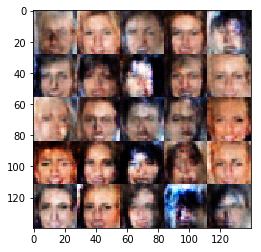

Epoch 1/1 Batch 1010... Discriminator Loss: 1.4631 ...  Generator Loss: 0.7714
Epoch 1/1 Batch 1020... Discriminator Loss: 1.3492 ...  Generator Loss: 0.7220
Epoch 1/1 Batch 1030... Discriminator Loss: 1.2246 ...  Generator Loss: 0.8097
Epoch 1/1 Batch 1040... Discriminator Loss: 1.3694 ...  Generator Loss: 0.9982
Epoch 1/1 Batch 1050... Discriminator Loss: 1.3359 ...  Generator Loss: 0.7258
Epoch 1/1 Batch 1060... Discriminator Loss: 1.3271 ...  Generator Loss: 1.2446
Epoch 1/1 Batch 1070... Discriminator Loss: 1.2733 ...  Generator Loss: 0.9863
Epoch 1/1 Batch 1080... Discriminator Loss: 1.3416 ...  Generator Loss: 0.9351
Epoch 1/1 Batch 1090... Discriminator Loss: 1.2329 ...  Generator Loss: 0.8589
Epoch 1/1 Batch 1100... Discriminator Loss: 1.5506 ...  Generator Loss: 0.6974


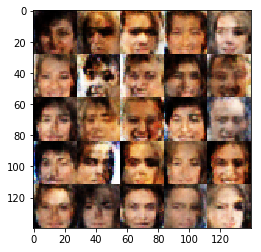

Epoch 1/1 Batch 1110... Discriminator Loss: 1.3298 ...  Generator Loss: 0.7557
Epoch 1/1 Batch 1120... Discriminator Loss: 1.1618 ...  Generator Loss: 0.6189
Epoch 1/1 Batch 1130... Discriminator Loss: 1.3398 ...  Generator Loss: 0.8833
Epoch 1/1 Batch 1140... Discriminator Loss: 1.2903 ...  Generator Loss: 0.6776
Epoch 1/1 Batch 1150... Discriminator Loss: 1.2884 ...  Generator Loss: 0.8980
Epoch 1/1 Batch 1160... Discriminator Loss: 1.3079 ...  Generator Loss: 0.7164
Epoch 1/1 Batch 1170... Discriminator Loss: 1.3315 ...  Generator Loss: 1.1513
Epoch 1/1 Batch 1180... Discriminator Loss: 1.2336 ...  Generator Loss: 0.7915
Epoch 1/1 Batch 1190... Discriminator Loss: 1.2036 ...  Generator Loss: 0.9004
Epoch 1/1 Batch 1200... Discriminator Loss: 1.2916 ...  Generator Loss: 1.0475


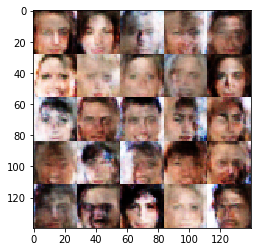

Epoch 1/1 Batch 1210... Discriminator Loss: 1.4566 ...  Generator Loss: 0.7252
Epoch 1/1 Batch 1220... Discriminator Loss: 1.1627 ...  Generator Loss: 0.7981
Epoch 1/1 Batch 1230... Discriminator Loss: 1.3536 ...  Generator Loss: 0.5061
Epoch 1/1 Batch 1240... Discriminator Loss: 1.2732 ...  Generator Loss: 0.8215
Epoch 1/1 Batch 1250... Discriminator Loss: 1.1900 ...  Generator Loss: 1.0133
Epoch 1/1 Batch 1260... Discriminator Loss: 1.4082 ...  Generator Loss: 0.6236
Epoch 1/1 Batch 1270... Discriminator Loss: 1.1262 ...  Generator Loss: 0.9846
Epoch 1/1 Batch 1280... Discriminator Loss: 1.4201 ...  Generator Loss: 0.9197
Epoch 1/1 Batch 1290... Discriminator Loss: 1.2059 ...  Generator Loss: 0.8658
Epoch 1/1 Batch 1300... Discriminator Loss: 1.1473 ...  Generator Loss: 0.7198


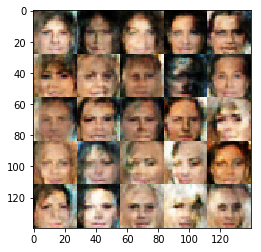

Epoch 1/1 Batch 1310... Discriminator Loss: 1.2045 ...  Generator Loss: 0.9935
Epoch 1/1 Batch 1320... Discriminator Loss: 1.2503 ...  Generator Loss: 0.5183
Epoch 1/1 Batch 1330... Discriminator Loss: 1.3387 ...  Generator Loss: 0.8629
Epoch 1/1 Batch 1340... Discriminator Loss: 1.1982 ...  Generator Loss: 0.7294
Epoch 1/1 Batch 1350... Discriminator Loss: 1.2017 ...  Generator Loss: 0.7688
Epoch 1/1 Batch 1360... Discriminator Loss: 1.2574 ...  Generator Loss: 0.8346
Epoch 1/1 Batch 1370... Discriminator Loss: 1.2495 ...  Generator Loss: 0.8773
Epoch 1/1 Batch 1380... Discriminator Loss: 1.4226 ...  Generator Loss: 0.6668
Epoch 1/1 Batch 1390... Discriminator Loss: 1.2008 ...  Generator Loss: 0.8654
Epoch 1/1 Batch 1400... Discriminator Loss: 1.2842 ...  Generator Loss: 0.5696


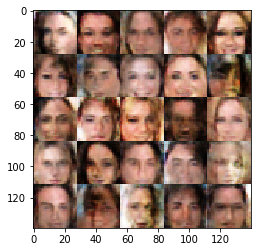

Epoch 1/1 Batch 1410... Discriminator Loss: 1.2459 ...  Generator Loss: 0.6824
Epoch 1/1 Batch 1420... Discriminator Loss: 1.3760 ...  Generator Loss: 0.9691
Epoch 1/1 Batch 1430... Discriminator Loss: 1.3209 ...  Generator Loss: 1.0850
Epoch 1/1 Batch 1440... Discriminator Loss: 1.1968 ...  Generator Loss: 0.5715
Epoch 1/1 Batch 1450... Discriminator Loss: 1.2229 ...  Generator Loss: 0.8464
Epoch 1/1 Batch 1460... Discriminator Loss: 1.2921 ...  Generator Loss: 0.6511
Epoch 1/1 Batch 1470... Discriminator Loss: 1.1914 ...  Generator Loss: 0.8143
Epoch 1/1 Batch 1480... Discriminator Loss: 1.0989 ...  Generator Loss: 1.0278
Epoch 1/1 Batch 1490... Discriminator Loss: 1.3323 ...  Generator Loss: 0.5777
Epoch 1/1 Batch 1500... Discriminator Loss: 1.3594 ...  Generator Loss: 0.5881


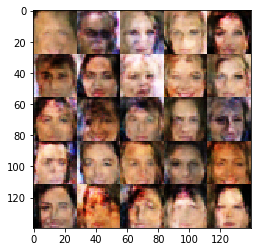

Epoch 1/1 Batch 1510... Discriminator Loss: 1.2061 ...  Generator Loss: 0.7877
Epoch 1/1 Batch 1520... Discriminator Loss: 1.1803 ...  Generator Loss: 0.8154
Epoch 1/1 Batch 1530... Discriminator Loss: 1.2327 ...  Generator Loss: 0.6692
Epoch 1/1 Batch 1540... Discriminator Loss: 1.3580 ...  Generator Loss: 0.7509
Epoch 1/1 Batch 1550... Discriminator Loss: 1.4007 ...  Generator Loss: 0.4262
Epoch 1/1 Batch 1560... Discriminator Loss: 1.0763 ...  Generator Loss: 0.9745
Epoch 1/1 Batch 1570... Discriminator Loss: 1.1817 ...  Generator Loss: 0.7133
Epoch 1/1 Batch 1580... Discriminator Loss: 1.2418 ...  Generator Loss: 0.9193
Epoch 1/1 Batch 1590... Discriminator Loss: 1.3501 ...  Generator Loss: 0.8146
Epoch 1/1 Batch 1600... Discriminator Loss: 1.1089 ...  Generator Loss: 0.6982


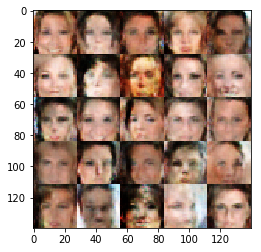

Epoch 1/1 Batch 1610... Discriminator Loss: 1.2517 ...  Generator Loss: 0.7321
Epoch 1/1 Batch 1620... Discriminator Loss: 1.3421 ...  Generator Loss: 0.5822
Epoch 1/1 Batch 1630... Discriminator Loss: 1.1053 ...  Generator Loss: 0.5795
Epoch 1/1 Batch 1640... Discriminator Loss: 1.1047 ...  Generator Loss: 1.3201
Epoch 1/1 Batch 1650... Discriminator Loss: 1.3399 ...  Generator Loss: 0.9449
Epoch 1/1 Batch 1660... Discriminator Loss: 1.2948 ...  Generator Loss: 1.1075
Epoch 1/1 Batch 1670... Discriminator Loss: 1.2865 ...  Generator Loss: 0.7273
Epoch 1/1 Batch 1680... Discriminator Loss: 1.2263 ...  Generator Loss: 0.7921
Epoch 1/1 Batch 1690... Discriminator Loss: 1.1214 ...  Generator Loss: 0.8325
Epoch 1/1 Batch 1700... Discriminator Loss: 1.2711 ...  Generator Loss: 0.5757


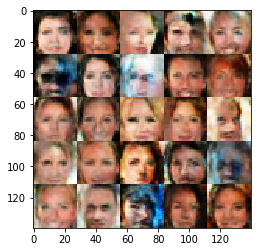

Epoch 1/1 Batch 1710... Discriminator Loss: 1.1985 ...  Generator Loss: 0.9121
Epoch 1/1 Batch 1720... Discriminator Loss: 1.1487 ...  Generator Loss: 1.0013
Epoch 1/1 Batch 1730... Discriminator Loss: 1.1928 ...  Generator Loss: 0.8269
Epoch 1/1 Batch 1740... Discriminator Loss: 1.1960 ...  Generator Loss: 0.7867
Epoch 1/1 Batch 1750... Discriminator Loss: 1.3106 ...  Generator Loss: 1.0739
Epoch 1/1 Batch 1760... Discriminator Loss: 1.2890 ...  Generator Loss: 0.7946
Epoch 1/1 Batch 1770... Discriminator Loss: 1.1923 ...  Generator Loss: 0.9386
Epoch 1/1 Batch 1780... Discriminator Loss: 1.2065 ...  Generator Loss: 0.7293
Epoch 1/1 Batch 1790... Discriminator Loss: 1.2202 ...  Generator Loss: 0.8513
Epoch 1/1 Batch 1800... Discriminator Loss: 1.1309 ...  Generator Loss: 0.6766


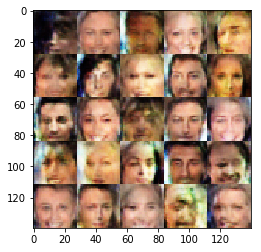

Epoch 1/1 Batch 1810... Discriminator Loss: 1.3147 ...  Generator Loss: 0.9879
Epoch 1/1 Batch 1820... Discriminator Loss: 1.4140 ...  Generator Loss: 0.8069
Epoch 1/1 Batch 1830... Discriminator Loss: 1.2729 ...  Generator Loss: 1.1235
Epoch 1/1 Batch 1840... Discriminator Loss: 1.1820 ...  Generator Loss: 0.7275
Epoch 1/1 Batch 1850... Discriminator Loss: 1.3690 ...  Generator Loss: 0.7698
Epoch 1/1 Batch 1860... Discriminator Loss: 1.2319 ...  Generator Loss: 0.7235
Epoch 1/1 Batch 1870... Discriminator Loss: 1.2082 ...  Generator Loss: 0.6227
Epoch 1/1 Batch 1880... Discriminator Loss: 1.2542 ...  Generator Loss: 0.5249
Epoch 1/1 Batch 1890... Discriminator Loss: 1.0899 ...  Generator Loss: 0.9135
Epoch 1/1 Batch 1900... Discriminator Loss: 1.4280 ...  Generator Loss: 0.5310


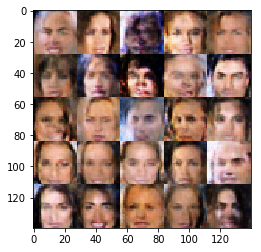

Epoch 1/1 Batch 1910... Discriminator Loss: 1.1231 ...  Generator Loss: 0.8180
Epoch 1/1 Batch 1920... Discriminator Loss: 1.1892 ...  Generator Loss: 1.0038
Epoch 1/1 Batch 1930... Discriminator Loss: 1.2231 ...  Generator Loss: 0.8254
Epoch 1/1 Batch 1940... Discriminator Loss: 1.2771 ...  Generator Loss: 0.6560
Epoch 1/1 Batch 1950... Discriminator Loss: 1.3018 ...  Generator Loss: 1.0534
Epoch 1/1 Batch 1960... Discriminator Loss: 1.5570 ...  Generator Loss: 0.4090
Epoch 1/1 Batch 1970... Discriminator Loss: 1.1273 ...  Generator Loss: 0.9349
Epoch 1/1 Batch 1980... Discriminator Loss: 1.2627 ...  Generator Loss: 0.7306
Epoch 1/1 Batch 1990... Discriminator Loss: 1.4028 ...  Generator Loss: 0.7016
Epoch 1/1 Batch 2000... Discriminator Loss: 1.5031 ...  Generator Loss: 0.4688


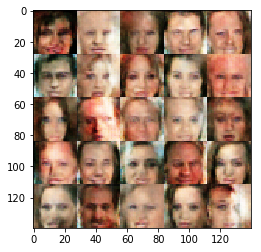

Epoch 1/1 Batch 2010... Discriminator Loss: 1.1739 ...  Generator Loss: 0.9107
Epoch 1/1 Batch 2020... Discriminator Loss: 1.3134 ...  Generator Loss: 0.9764
Epoch 1/1 Batch 2030... Discriminator Loss: 1.3910 ...  Generator Loss: 0.4030
Epoch 1/1 Batch 2040... Discriminator Loss: 1.2333 ...  Generator Loss: 0.6823
Epoch 1/1 Batch 2050... Discriminator Loss: 1.3505 ...  Generator Loss: 0.7191
Epoch 1/1 Batch 2060... Discriminator Loss: 1.2104 ...  Generator Loss: 1.0422
Epoch 1/1 Batch 2070... Discriminator Loss: 1.1943 ...  Generator Loss: 0.7554
Epoch 1/1 Batch 2080... Discriminator Loss: 1.2764 ...  Generator Loss: 0.8630
Epoch 1/1 Batch 2090... Discriminator Loss: 1.1526 ...  Generator Loss: 0.6972
Epoch 1/1 Batch 2100... Discriminator Loss: 1.2109 ...  Generator Loss: 0.6265


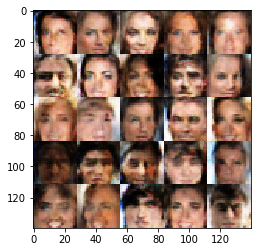

Epoch 1/1 Batch 2110... Discriminator Loss: 1.2287 ...  Generator Loss: 0.9855
Epoch 1/1 Batch 2120... Discriminator Loss: 1.1802 ...  Generator Loss: 1.0361
Epoch 1/1 Batch 2130... Discriminator Loss: 1.3086 ...  Generator Loss: 1.0958
Epoch 1/1 Batch 2140... Discriminator Loss: 1.1994 ...  Generator Loss: 0.7786
Epoch 1/1 Batch 2150... Discriminator Loss: 1.0968 ...  Generator Loss: 0.9919
Epoch 1/1 Batch 2160... Discriminator Loss: 1.2810 ...  Generator Loss: 0.6555
Epoch 1/1 Batch 2170... Discriminator Loss: 1.2092 ...  Generator Loss: 0.6720
Epoch 1/1 Batch 2180... Discriminator Loss: 1.2714 ...  Generator Loss: 0.9221
Epoch 1/1 Batch 2190... Discriminator Loss: 1.3206 ...  Generator Loss: 0.8996
Epoch 1/1 Batch 2200... Discriminator Loss: 1.3404 ...  Generator Loss: 0.4895


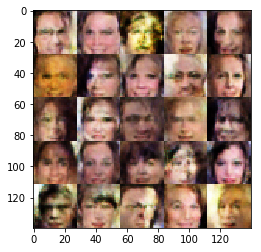

Epoch 1/1 Batch 2210... Discriminator Loss: 1.1507 ...  Generator Loss: 0.6981
Epoch 1/1 Batch 2220... Discriminator Loss: 1.1927 ...  Generator Loss: 0.5643
Epoch 1/1 Batch 2230... Discriminator Loss: 1.1010 ...  Generator Loss: 0.8118
Epoch 1/1 Batch 2240... Discriminator Loss: 1.2030 ...  Generator Loss: 0.9261
Epoch 1/1 Batch 2250... Discriminator Loss: 1.2789 ...  Generator Loss: 0.6067
Epoch 1/1 Batch 2260... Discriminator Loss: 1.1625 ...  Generator Loss: 0.5555
Epoch 1/1 Batch 2270... Discriminator Loss: 1.1384 ...  Generator Loss: 0.9038
Epoch 1/1 Batch 2280... Discriminator Loss: 1.0713 ...  Generator Loss: 0.6966
Epoch 1/1 Batch 2290... Discriminator Loss: 1.2698 ...  Generator Loss: 0.9326
Epoch 1/1 Batch 2300... Discriminator Loss: 1.2383 ...  Generator Loss: 0.7440


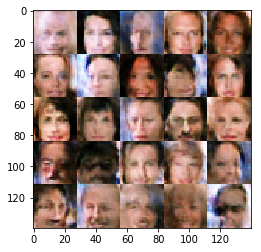

Epoch 1/1 Batch 2310... Discriminator Loss: 1.2409 ...  Generator Loss: 1.3071
Epoch 1/1 Batch 2320... Discriminator Loss: 1.1567 ...  Generator Loss: 1.0117
Epoch 1/1 Batch 2330... Discriminator Loss: 1.1813 ...  Generator Loss: 0.7934
Epoch 1/1 Batch 2340... Discriminator Loss: 1.2929 ...  Generator Loss: 0.5112
Epoch 1/1 Batch 2350... Discriminator Loss: 1.3873 ...  Generator Loss: 0.5472
Epoch 1/1 Batch 2360... Discriminator Loss: 1.2588 ...  Generator Loss: 0.7145
Epoch 1/1 Batch 2370... Discriminator Loss: 1.1697 ...  Generator Loss: 1.0208
Epoch 1/1 Batch 2380... Discriminator Loss: 1.1838 ...  Generator Loss: 0.7586
Epoch 1/1 Batch 2390... Discriminator Loss: 1.3420 ...  Generator Loss: 0.8260
Epoch 1/1 Batch 2400... Discriminator Loss: 1.2771 ...  Generator Loss: 0.8427


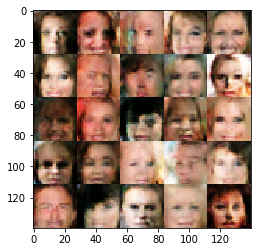

Epoch 1/1 Batch 2410... Discriminator Loss: 1.1187 ...  Generator Loss: 0.8753
Epoch 1/1 Batch 2420... Discriminator Loss: 1.1824 ...  Generator Loss: 0.8520
Epoch 1/1 Batch 2430... Discriminator Loss: 1.2622 ...  Generator Loss: 0.7978
Epoch 1/1 Batch 2440... Discriminator Loss: 1.2373 ...  Generator Loss: 0.9750
Epoch 1/1 Batch 2450... Discriminator Loss: 1.1434 ...  Generator Loss: 0.7713
Epoch 1/1 Batch 2460... Discriminator Loss: 1.1526 ...  Generator Loss: 0.6781
Epoch 1/1 Batch 2470... Discriminator Loss: 1.4035 ...  Generator Loss: 0.5336
Epoch 1/1 Batch 2480... Discriminator Loss: 1.1980 ...  Generator Loss: 0.8951
Epoch 1/1 Batch 2490... Discriminator Loss: 1.1729 ...  Generator Loss: 0.7048
Epoch 1/1 Batch 2500... Discriminator Loss: 1.2118 ...  Generator Loss: 0.9405


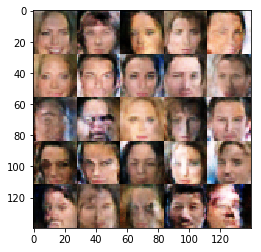

Epoch 1/1 Batch 2510... Discriminator Loss: 1.2534 ...  Generator Loss: 0.8438
Epoch 1/1 Batch 2520... Discriminator Loss: 1.3011 ...  Generator Loss: 0.6728
Epoch 1/1 Batch 2530... Discriminator Loss: 1.1411 ...  Generator Loss: 1.1908
Epoch 1/1 Batch 2540... Discriminator Loss: 1.1452 ...  Generator Loss: 0.7756
Epoch 1/1 Batch 2550... Discriminator Loss: 1.1271 ...  Generator Loss: 0.7280
Epoch 1/1 Batch 2560... Discriminator Loss: 1.2108 ...  Generator Loss: 0.9969
Epoch 1/1 Batch 2570... Discriminator Loss: 1.2368 ...  Generator Loss: 0.8856
Epoch 1/1 Batch 2580... Discriminator Loss: 1.2194 ...  Generator Loss: 1.1963
Epoch 1/1 Batch 2590... Discriminator Loss: 1.3656 ...  Generator Loss: 0.9528
Epoch 1/1 Batch 2600... Discriminator Loss: 1.1080 ...  Generator Loss: 0.8899


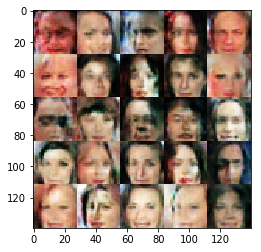

Epoch 1/1 Batch 2610... Discriminator Loss: 1.2419 ...  Generator Loss: 0.7161
Epoch 1/1 Batch 2620... Discriminator Loss: 1.3983 ...  Generator Loss: 0.8185
Epoch 1/1 Batch 2630... Discriminator Loss: 1.1987 ...  Generator Loss: 0.7538
Epoch 1/1 Batch 2640... Discriminator Loss: 1.3634 ...  Generator Loss: 0.6802
Epoch 1/1 Batch 2650... Discriminator Loss: 1.1406 ...  Generator Loss: 0.8759
Epoch 1/1 Batch 2660... Discriminator Loss: 1.2716 ...  Generator Loss: 0.8158
Epoch 1/1 Batch 2670... Discriminator Loss: 1.2195 ...  Generator Loss: 0.9446
Epoch 1/1 Batch 2680... Discriminator Loss: 1.3144 ...  Generator Loss: 0.6956
Epoch 1/1 Batch 2690... Discriminator Loss: 1.1041 ...  Generator Loss: 0.8349
Epoch 1/1 Batch 2700... Discriminator Loss: 1.2272 ...  Generator Loss: 0.7939


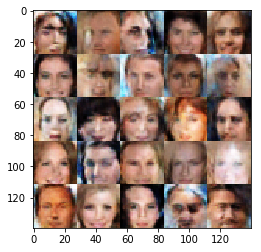

Epoch 1/1 Batch 2710... Discriminator Loss: 1.2637 ...  Generator Loss: 0.7795
Epoch 1/1 Batch 2720... Discriminator Loss: 1.2514 ...  Generator Loss: 0.6573
Epoch 1/1 Batch 2730... Discriminator Loss: 0.9506 ...  Generator Loss: 0.9991
Epoch 1/1 Batch 2740... Discriminator Loss: 1.1937 ...  Generator Loss: 0.7748
Epoch 1/1 Batch 2750... Discriminator Loss: 1.1766 ...  Generator Loss: 0.5513
Epoch 1/1 Batch 2760... Discriminator Loss: 1.2439 ...  Generator Loss: 0.8773
Epoch 1/1 Batch 2770... Discriminator Loss: 1.4144 ...  Generator Loss: 0.5867
Epoch 1/1 Batch 2780... Discriminator Loss: 1.2189 ...  Generator Loss: 0.9681
Epoch 1/1 Batch 2790... Discriminator Loss: 1.2209 ...  Generator Loss: 0.5657
Epoch 1/1 Batch 2800... Discriminator Loss: 1.1648 ...  Generator Loss: 0.8899


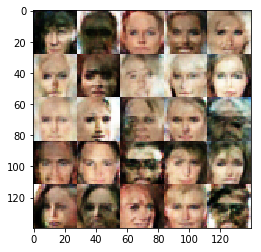

Epoch 1/1 Batch 2810... Discriminator Loss: 1.2092 ...  Generator Loss: 0.5120
Epoch 1/1 Batch 2820... Discriminator Loss: 1.0010 ...  Generator Loss: 1.0759
Epoch 1/1 Batch 2830... Discriminator Loss: 1.2169 ...  Generator Loss: 0.7435
Epoch 1/1 Batch 2840... Discriminator Loss: 1.0698 ...  Generator Loss: 0.9275
Epoch 1/1 Batch 2850... Discriminator Loss: 1.2622 ...  Generator Loss: 0.7049
Epoch 1/1 Batch 2860... Discriminator Loss: 1.0620 ...  Generator Loss: 0.7874
Epoch 1/1 Batch 2870... Discriminator Loss: 1.0930 ...  Generator Loss: 1.0004
Epoch 1/1 Batch 2880... Discriminator Loss: 1.1475 ...  Generator Loss: 0.7675
Epoch 1/1 Batch 2890... Discriminator Loss: 1.1258 ...  Generator Loss: 0.9433
Epoch 1/1 Batch 2900... Discriminator Loss: 1.1164 ...  Generator Loss: 0.9272


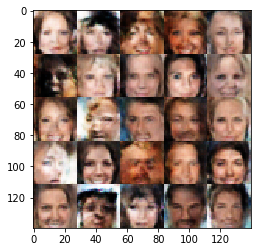

Epoch 1/1 Batch 2910... Discriminator Loss: 1.2306 ...  Generator Loss: 0.5084
Epoch 1/1 Batch 2920... Discriminator Loss: 1.2223 ...  Generator Loss: 0.9885
Epoch 1/1 Batch 2930... Discriminator Loss: 1.0894 ...  Generator Loss: 1.0163
Epoch 1/1 Batch 2940... Discriminator Loss: 1.1794 ...  Generator Loss: 1.0981
Epoch 1/1 Batch 2950... Discriminator Loss: 1.1910 ...  Generator Loss: 0.7883
Epoch 1/1 Batch 2960... Discriminator Loss: 1.1548 ...  Generator Loss: 0.6345
Epoch 1/1 Batch 2970... Discriminator Loss: 1.2388 ...  Generator Loss: 0.5617
Epoch 1/1 Batch 2980... Discriminator Loss: 1.0488 ...  Generator Loss: 0.8116
Epoch 1/1 Batch 2990... Discriminator Loss: 1.2053 ...  Generator Loss: 0.7699
Epoch 1/1 Batch 3000... Discriminator Loss: 1.2388 ...  Generator Loss: 0.8219


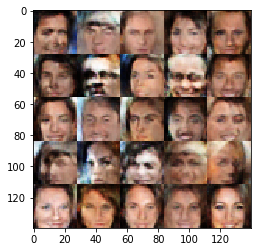

Epoch 1/1 Batch 3010... Discriminator Loss: 1.4070 ...  Generator Loss: 0.9467
Epoch 1/1 Batch 3020... Discriminator Loss: 1.1162 ...  Generator Loss: 0.9713
Epoch 1/1 Batch 3030... Discriminator Loss: 1.3536 ...  Generator Loss: 0.8195
Epoch 1/1 Batch 3040... Discriminator Loss: 1.2186 ...  Generator Loss: 0.5749
Epoch 1/1 Batch 3050... Discriminator Loss: 1.3803 ...  Generator Loss: 0.4178
Epoch 1/1 Batch 3060... Discriminator Loss: 1.1343 ...  Generator Loss: 0.8677
Epoch 1/1 Batch 3070... Discriminator Loss: 1.3043 ...  Generator Loss: 0.5204
Epoch 1/1 Batch 3080... Discriminator Loss: 1.1823 ...  Generator Loss: 0.7443
Epoch 1/1 Batch 3090... Discriminator Loss: 1.3030 ...  Generator Loss: 0.5671
Epoch 1/1 Batch 3100... Discriminator Loss: 1.3241 ...  Generator Loss: 0.8822


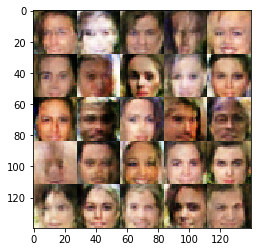

Epoch 1/1 Batch 3110... Discriminator Loss: 1.2613 ...  Generator Loss: 0.5705
Epoch 1/1 Batch 3120... Discriminator Loss: 1.1865 ...  Generator Loss: 1.3277
Epoch 1/1 Batch 3130... Discriminator Loss: 1.2008 ...  Generator Loss: 0.9964
Epoch 1/1 Batch 3140... Discriminator Loss: 1.2703 ...  Generator Loss: 0.7242
Epoch 1/1 Batch 3150... Discriminator Loss: 1.0839 ...  Generator Loss: 0.9145
Epoch 1/1 Batch 3160... Discriminator Loss: 1.1802 ...  Generator Loss: 0.9240
Epoch 1/1 Batch 3170... Discriminator Loss: 1.0782 ...  Generator Loss: 0.8608
Epoch 1/1 Batch 3180... Discriminator Loss: 1.1849 ...  Generator Loss: 1.0461
Epoch 1/1 Batch 3190... Discriminator Loss: 1.2575 ...  Generator Loss: 0.5924
Epoch 1/1 Batch 3200... Discriminator Loss: 1.1043 ...  Generator Loss: 0.9622


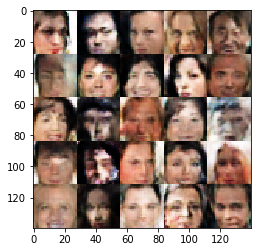

Epoch 1/1 Batch 3210... Discriminator Loss: 1.3134 ...  Generator Loss: 0.9857
Epoch 1/1 Batch 3220... Discriminator Loss: 1.1485 ...  Generator Loss: 0.7339
Epoch 1/1 Batch 3230... Discriminator Loss: 1.2738 ...  Generator Loss: 0.5358
Epoch 1/1 Batch 3240... Discriminator Loss: 1.2970 ...  Generator Loss: 0.4894
Epoch 1/1 Batch 3250... Discriminator Loss: 1.2780 ...  Generator Loss: 1.0267
Epoch 1/1 Batch 3260... Discriminator Loss: 1.1181 ...  Generator Loss: 0.7735
Epoch 1/1 Batch 3270... Discriminator Loss: 1.3612 ...  Generator Loss: 0.6608
Epoch 1/1 Batch 3280... Discriminator Loss: 1.2392 ...  Generator Loss: 1.2735
Epoch 1/1 Batch 3290... Discriminator Loss: 1.1544 ...  Generator Loss: 1.0032
Epoch 1/1 Batch 3300... Discriminator Loss: 1.1734 ...  Generator Loss: 0.6284


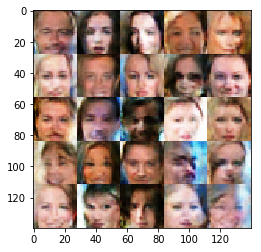

Epoch 1/1 Batch 3310... Discriminator Loss: 1.2596 ...  Generator Loss: 0.4905
Epoch 1/1 Batch 3320... Discriminator Loss: 1.1735 ...  Generator Loss: 0.9119
Epoch 1/1 Batch 3330... Discriminator Loss: 1.0717 ...  Generator Loss: 0.9526
Epoch 1/1 Batch 3340... Discriminator Loss: 0.9683 ...  Generator Loss: 0.9122
Epoch 1/1 Batch 3350... Discriminator Loss: 1.2877 ...  Generator Loss: 0.7781
Epoch 1/1 Batch 3360... Discriminator Loss: 1.1057 ...  Generator Loss: 1.0639
Epoch 1/1 Batch 3370... Discriminator Loss: 1.3963 ...  Generator Loss: 0.8179
Epoch 1/1 Batch 3380... Discriminator Loss: 1.2675 ...  Generator Loss: 0.5774
Epoch 1/1 Batch 3390... Discriminator Loss: 1.0985 ...  Generator Loss: 0.7849
Epoch 1/1 Batch 3400... Discriminator Loss: 1.0738 ...  Generator Loss: 0.8760


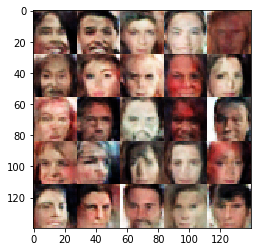

Epoch 1/1 Batch 3410... Discriminator Loss: 1.1056 ...  Generator Loss: 0.6675
Epoch 1/1 Batch 3420... Discriminator Loss: 1.1430 ...  Generator Loss: 0.9477
Epoch 1/1 Batch 3430... Discriminator Loss: 1.0735 ...  Generator Loss: 1.2553
Epoch 1/1 Batch 3440... Discriminator Loss: 1.3689 ...  Generator Loss: 0.5643
Epoch 1/1 Batch 3450... Discriminator Loss: 1.0211 ...  Generator Loss: 1.1616
Epoch 1/1 Batch 3460... Discriminator Loss: 1.2451 ...  Generator Loss: 0.6021
Epoch 1/1 Batch 3470... Discriminator Loss: 1.1801 ...  Generator Loss: 1.0566
Epoch 1/1 Batch 3480... Discriminator Loss: 1.1215 ...  Generator Loss: 0.6363
Epoch 1/1 Batch 3490... Discriminator Loss: 1.2345 ...  Generator Loss: 0.7094
Epoch 1/1 Batch 3500... Discriminator Loss: 1.1878 ...  Generator Loss: 0.5774


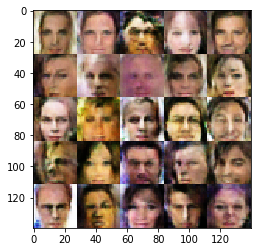

Epoch 1/1 Batch 3510... Discriminator Loss: 1.3072 ...  Generator Loss: 0.6843
Epoch 1/1 Batch 3520... Discriminator Loss: 1.1586 ...  Generator Loss: 1.0635
Epoch 1/1 Batch 3530... Discriminator Loss: 1.1587 ...  Generator Loss: 1.2014
Epoch 1/1 Batch 3540... Discriminator Loss: 1.1134 ...  Generator Loss: 0.9713
Epoch 1/1 Batch 3550... Discriminator Loss: 1.4069 ...  Generator Loss: 0.9772
Epoch 1/1 Batch 3560... Discriminator Loss: 1.2367 ...  Generator Loss: 1.2259
Epoch 1/1 Batch 3570... Discriminator Loss: 1.3090 ...  Generator Loss: 1.1043
Epoch 1/1 Batch 3580... Discriminator Loss: 1.4276 ...  Generator Loss: 1.3431
Epoch 1/1 Batch 3590... Discriminator Loss: 1.0373 ...  Generator Loss: 0.6753
Epoch 1/1 Batch 3600... Discriminator Loss: 1.0169 ...  Generator Loss: 0.8124


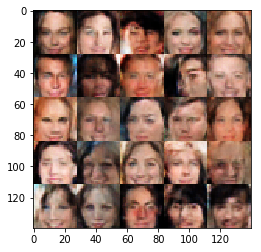

Epoch 1/1 Batch 3610... Discriminator Loss: 1.1254 ...  Generator Loss: 0.8244
Epoch 1/1 Batch 3620... Discriminator Loss: 1.0796 ...  Generator Loss: 0.8915
Epoch 1/1 Batch 3630... Discriminator Loss: 1.1233 ...  Generator Loss: 0.7326
Epoch 1/1 Batch 3640... Discriminator Loss: 1.1405 ...  Generator Loss: 0.6808
Epoch 1/1 Batch 3650... Discriminator Loss: 1.1052 ...  Generator Loss: 1.2003
Epoch 1/1 Batch 3660... Discriminator Loss: 1.0148 ...  Generator Loss: 1.0398
Epoch 1/1 Batch 3670... Discriminator Loss: 1.0234 ...  Generator Loss: 0.9368
Epoch 1/1 Batch 3680... Discriminator Loss: 1.1283 ...  Generator Loss: 1.6302
Epoch 1/1 Batch 3690... Discriminator Loss: 1.2169 ...  Generator Loss: 0.5134
Epoch 1/1 Batch 3700... Discriminator Loss: 1.0555 ...  Generator Loss: 1.1835


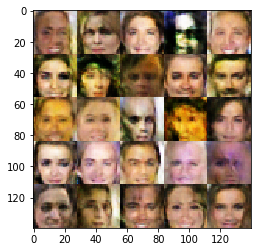

Epoch 1/1 Batch 3710... Discriminator Loss: 1.0615 ...  Generator Loss: 0.8032
Epoch 1/1 Batch 3720... Discriminator Loss: 1.0374 ...  Generator Loss: 0.9162
Epoch 1/1 Batch 3730... Discriminator Loss: 1.0519 ...  Generator Loss: 0.9484
Epoch 1/1 Batch 3740... Discriminator Loss: 1.1392 ...  Generator Loss: 0.8112
Epoch 1/1 Batch 3750... Discriminator Loss: 0.9835 ...  Generator Loss: 0.9231
Epoch 1/1 Batch 3760... Discriminator Loss: 1.0857 ...  Generator Loss: 0.9155
Epoch 1/1 Batch 3770... Discriminator Loss: 1.1310 ...  Generator Loss: 0.7990
Epoch 1/1 Batch 3780... Discriminator Loss: 1.2616 ...  Generator Loss: 0.7062
Epoch 1/1 Batch 3790... Discriminator Loss: 1.0792 ...  Generator Loss: 1.1151
Epoch 1/1 Batch 3800... Discriminator Loss: 1.0404 ...  Generator Loss: 0.9153


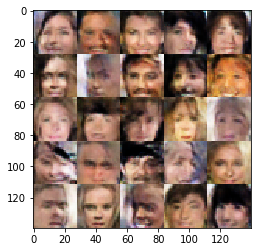

Epoch 1/1 Batch 3810... Discriminator Loss: 1.2013 ...  Generator Loss: 1.2950
Epoch 1/1 Batch 3820... Discriminator Loss: 1.1554 ...  Generator Loss: 0.9962
Epoch 1/1 Batch 3830... Discriminator Loss: 1.2635 ...  Generator Loss: 0.5199
Epoch 1/1 Batch 3840... Discriminator Loss: 1.1356 ...  Generator Loss: 0.7125
Epoch 1/1 Batch 3850... Discriminator Loss: 1.0081 ...  Generator Loss: 1.2570
Epoch 1/1 Batch 3860... Discriminator Loss: 1.2148 ...  Generator Loss: 0.8722
Epoch 1/1 Batch 3870... Discriminator Loss: 0.9815 ...  Generator Loss: 1.0368
Epoch 1/1 Batch 3880... Discriminator Loss: 1.4100 ...  Generator Loss: 0.4618
Epoch 1/1 Batch 3890... Discriminator Loss: 0.9872 ...  Generator Loss: 1.1066
Epoch 1/1 Batch 3900... Discriminator Loss: 1.0685 ...  Generator Loss: 0.6805


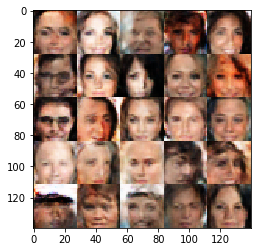

Epoch 1/1 Batch 3910... Discriminator Loss: 1.0806 ...  Generator Loss: 0.8150
Epoch 1/1 Batch 3920... Discriminator Loss: 1.2327 ...  Generator Loss: 0.9823
Epoch 1/1 Batch 3930... Discriminator Loss: 1.1558 ...  Generator Loss: 0.9280
Epoch 1/1 Batch 3940... Discriminator Loss: 1.2894 ...  Generator Loss: 1.1488
Epoch 1/1 Batch 3950... Discriminator Loss: 1.1533 ...  Generator Loss: 1.2108
Epoch 1/1 Batch 3960... Discriminator Loss: 1.1164 ...  Generator Loss: 0.7315
Epoch 1/1 Batch 3970... Discriminator Loss: 1.1994 ...  Generator Loss: 0.6553
Epoch 1/1 Batch 3980... Discriminator Loss: 0.9979 ...  Generator Loss: 0.8000
Epoch 1/1 Batch 3990... Discriminator Loss: 1.1418 ...  Generator Loss: 0.6042
Epoch 1/1 Batch 4000... Discriminator Loss: 0.9739 ...  Generator Loss: 0.7666


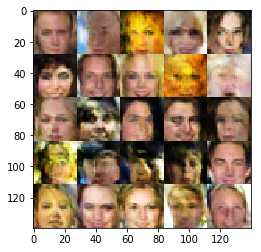

Epoch 1/1 Batch 4010... Discriminator Loss: 1.0867 ...  Generator Loss: 0.6309
Epoch 1/1 Batch 4020... Discriminator Loss: 0.9429 ...  Generator Loss: 0.9092
Epoch 1/1 Batch 4030... Discriminator Loss: 1.0030 ...  Generator Loss: 1.0727
Epoch 1/1 Batch 4040... Discriminator Loss: 1.1752 ...  Generator Loss: 0.9052
Epoch 1/1 Batch 4050... Discriminator Loss: 1.0308 ...  Generator Loss: 1.0524
Epoch 1/1 Batch 4060... Discriminator Loss: 0.9473 ...  Generator Loss: 0.8248
Epoch 1/1 Batch 4070... Discriminator Loss: 1.3087 ...  Generator Loss: 0.8824
Epoch 1/1 Batch 4080... Discriminator Loss: 1.0062 ...  Generator Loss: 0.9766
Epoch 1/1 Batch 4090... Discriminator Loss: 1.2760 ...  Generator Loss: 0.7729
Epoch 1/1 Batch 4100... Discriminator Loss: 1.0217 ...  Generator Loss: 0.8966


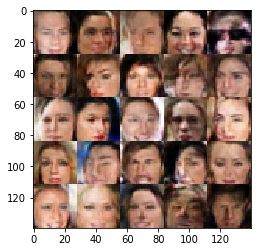

Epoch 1/1 Batch 4110... Discriminator Loss: 1.4306 ...  Generator Loss: 0.6322
Epoch 1/1 Batch 4120... Discriminator Loss: 1.0781 ...  Generator Loss: 0.7671
Epoch 1/1 Batch 4130... Discriminator Loss: 1.2226 ...  Generator Loss: 1.4227
Epoch 1/1 Batch 4140... Discriminator Loss: 1.1677 ...  Generator Loss: 1.4247
Epoch 1/1 Batch 4150... Discriminator Loss: 1.1704 ...  Generator Loss: 1.0516
Epoch 1/1 Batch 4160... Discriminator Loss: 0.9985 ...  Generator Loss: 0.8398
Epoch 1/1 Batch 4170... Discriminator Loss: 1.3575 ...  Generator Loss: 0.6416
Epoch 1/1 Batch 4180... Discriminator Loss: 1.0508 ...  Generator Loss: 1.0852
Epoch 1/1 Batch 4190... Discriminator Loss: 1.3490 ...  Generator Loss: 0.4003
Epoch 1/1 Batch 4200... Discriminator Loss: 1.1886 ...  Generator Loss: 0.7349


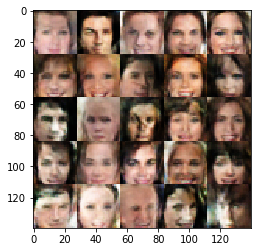

Epoch 1/1 Batch 4210... Discriminator Loss: 1.1897 ...  Generator Loss: 0.6207
Epoch 1/1 Batch 4220... Discriminator Loss: 1.1211 ...  Generator Loss: 0.7571
Epoch 1/1 Batch 4230... Discriminator Loss: 1.1124 ...  Generator Loss: 0.7919
Epoch 1/1 Batch 4240... Discriminator Loss: 1.2165 ...  Generator Loss: 1.1093
Epoch 1/1 Batch 4250... Discriminator Loss: 1.0626 ...  Generator Loss: 0.7740
Epoch 1/1 Batch 4260... Discriminator Loss: 1.0937 ...  Generator Loss: 0.6912
Epoch 1/1 Batch 4270... Discriminator Loss: 0.9727 ...  Generator Loss: 0.8436
Epoch 1/1 Batch 4280... Discriminator Loss: 1.0651 ...  Generator Loss: 0.7574
Epoch 1/1 Batch 4290... Discriminator Loss: 1.1616 ...  Generator Loss: 0.7525
Epoch 1/1 Batch 4300... Discriminator Loss: 1.1691 ...  Generator Loss: 0.5442


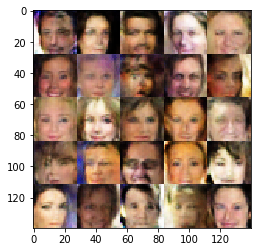

Epoch 1/1 Batch 4310... Discriminator Loss: 1.1957 ...  Generator Loss: 0.5910
Epoch 1/1 Batch 4320... Discriminator Loss: 1.2448 ...  Generator Loss: 0.5035
Epoch 1/1 Batch 4330... Discriminator Loss: 1.1313 ...  Generator Loss: 1.4142
Epoch 1/1 Batch 4340... Discriminator Loss: 1.1217 ...  Generator Loss: 1.0578
Epoch 1/1 Batch 4350... Discriminator Loss: 1.1133 ...  Generator Loss: 0.7000
Epoch 1/1 Batch 4360... Discriminator Loss: 1.0999 ...  Generator Loss: 0.7938
Epoch 1/1 Batch 4370... Discriminator Loss: 1.3098 ...  Generator Loss: 0.6542
Epoch 1/1 Batch 4380... Discriminator Loss: 1.1857 ...  Generator Loss: 1.1471
Epoch 1/1 Batch 4390... Discriminator Loss: 0.9234 ...  Generator Loss: 1.0160
Epoch 1/1 Batch 4400... Discriminator Loss: 1.2803 ...  Generator Loss: 0.5233


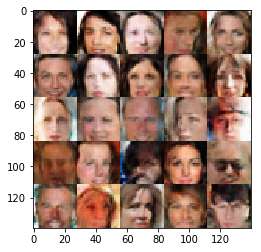

Epoch 1/1 Batch 4410... Discriminator Loss: 1.0701 ...  Generator Loss: 0.9017
Epoch 1/1 Batch 4420... Discriminator Loss: 1.0895 ...  Generator Loss: 0.9004
Epoch 1/1 Batch 4430... Discriminator Loss: 1.0434 ...  Generator Loss: 0.7488
Epoch 1/1 Batch 4440... Discriminator Loss: 1.0607 ...  Generator Loss: 0.7511
Epoch 1/1 Batch 4450... Discriminator Loss: 1.1002 ...  Generator Loss: 0.7170
Epoch 1/1 Batch 4460... Discriminator Loss: 1.3513 ...  Generator Loss: 0.4756
Epoch 1/1 Batch 4470... Discriminator Loss: 1.1357 ...  Generator Loss: 0.9284
Epoch 1/1 Batch 4480... Discriminator Loss: 1.2060 ...  Generator Loss: 0.5892
Epoch 1/1 Batch 4490... Discriminator Loss: 1.0710 ...  Generator Loss: 0.7795
Epoch 1/1 Batch 4500... Discriminator Loss: 1.2792 ...  Generator Loss: 1.0384


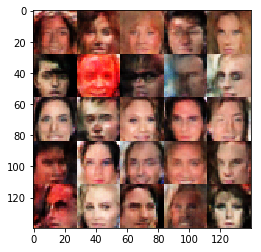

Epoch 1/1 Batch 4510... Discriminator Loss: 1.0367 ...  Generator Loss: 1.2685
Epoch 1/1 Batch 4520... Discriminator Loss: 1.2163 ...  Generator Loss: 0.6995
Epoch 1/1 Batch 4530... Discriminator Loss: 0.8739 ...  Generator Loss: 0.8430
Epoch 1/1 Batch 4540... Discriminator Loss: 0.9380 ...  Generator Loss: 0.8848
Epoch 1/1 Batch 4550... Discriminator Loss: 1.0840 ...  Generator Loss: 0.8833
Epoch 1/1 Batch 4560... Discriminator Loss: 0.9028 ...  Generator Loss: 0.7551
Epoch 1/1 Batch 4570... Discriminator Loss: 1.1276 ...  Generator Loss: 1.2667
Epoch 1/1 Batch 4580... Discriminator Loss: 1.1293 ...  Generator Loss: 0.7411
Epoch 1/1 Batch 4590... Discriminator Loss: 1.2079 ...  Generator Loss: 0.6204
Epoch 1/1 Batch 4600... Discriminator Loss: 0.9427 ...  Generator Loss: 0.7840


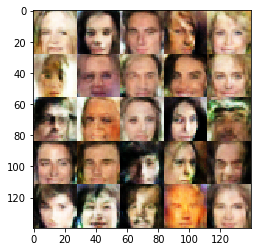

Epoch 1/1 Batch 4610... Discriminator Loss: 0.8114 ...  Generator Loss: 0.9911
Epoch 1/1 Batch 4620... Discriminator Loss: 1.2342 ...  Generator Loss: 0.5602
Epoch 1/1 Batch 4630... Discriminator Loss: 1.1433 ...  Generator Loss: 0.5302
Epoch 1/1 Batch 4640... Discriminator Loss: 1.0011 ...  Generator Loss: 1.1575
Epoch 1/1 Batch 4650... Discriminator Loss: 0.9658 ...  Generator Loss: 0.8572
Epoch 1/1 Batch 4660... Discriminator Loss: 1.1883 ...  Generator Loss: 1.1570
Epoch 1/1 Batch 4670... Discriminator Loss: 1.0297 ...  Generator Loss: 0.8499
Epoch 1/1 Batch 4680... Discriminator Loss: 1.0324 ...  Generator Loss: 1.0325
Epoch 1/1 Batch 4690... Discriminator Loss: 1.0795 ...  Generator Loss: 1.3297
Epoch 1/1 Batch 4700... Discriminator Loss: 0.9322 ...  Generator Loss: 1.0452


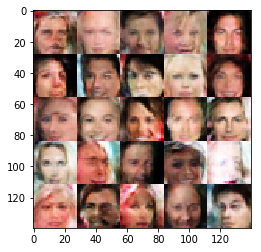

Epoch 1/1 Batch 4710... Discriminator Loss: 0.9677 ...  Generator Loss: 1.3853
Epoch 1/1 Batch 4720... Discriminator Loss: 1.0952 ...  Generator Loss: 0.9061
Epoch 1/1 Batch 4730... Discriminator Loss: 1.3485 ...  Generator Loss: 0.5420
Epoch 1/1 Batch 4740... Discriminator Loss: 1.0011 ...  Generator Loss: 0.8628
Epoch 1/1 Batch 4750... Discriminator Loss: 1.2391 ...  Generator Loss: 1.0522
Epoch 1/1 Batch 4760... Discriminator Loss: 1.0493 ...  Generator Loss: 0.8981
Epoch 1/1 Batch 4770... Discriminator Loss: 1.2642 ...  Generator Loss: 0.8816
Epoch 1/1 Batch 4780... Discriminator Loss: 0.8806 ...  Generator Loss: 1.1205
Epoch 1/1 Batch 4790... Discriminator Loss: 1.2335 ...  Generator Loss: 1.4673
Epoch 1/1 Batch 4800... Discriminator Loss: 1.0129 ...  Generator Loss: 1.0969


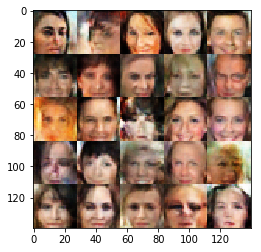

Epoch 1/1 Batch 4810... Discriminator Loss: 1.1455 ...  Generator Loss: 0.9210
Epoch 1/1 Batch 4820... Discriminator Loss: 1.1189 ...  Generator Loss: 0.8887
Epoch 1/1 Batch 4830... Discriminator Loss: 1.1196 ...  Generator Loss: 0.9342
Epoch 1/1 Batch 4840... Discriminator Loss: 0.9228 ...  Generator Loss: 0.9597
Epoch 1/1 Batch 4850... Discriminator Loss: 1.2354 ...  Generator Loss: 0.4421
Epoch 1/1 Batch 4860... Discriminator Loss: 1.0871 ...  Generator Loss: 0.9457
Epoch 1/1 Batch 4870... Discriminator Loss: 1.0402 ...  Generator Loss: 0.6780
Epoch 1/1 Batch 4880... Discriminator Loss: 1.2094 ...  Generator Loss: 1.0545
Epoch 1/1 Batch 4890... Discriminator Loss: 1.1096 ...  Generator Loss: 1.3651
Epoch 1/1 Batch 4900... Discriminator Loss: 1.1279 ...  Generator Loss: 0.8567


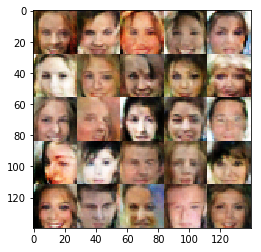

Epoch 1/1 Batch 4910... Discriminator Loss: 1.0849 ...  Generator Loss: 1.0290
Epoch 1/1 Batch 4920... Discriminator Loss: 0.9083 ...  Generator Loss: 1.5453
Epoch 1/1 Batch 4930... Discriminator Loss: 1.3995 ...  Generator Loss: 1.4658
Epoch 1/1 Batch 4940... Discriminator Loss: 1.0597 ...  Generator Loss: 0.7372
Epoch 1/1 Batch 4950... Discriminator Loss: 0.9890 ...  Generator Loss: 1.0132
Epoch 1/1 Batch 4960... Discriminator Loss: 1.4444 ...  Generator Loss: 0.4091
Epoch 1/1 Batch 4970... Discriminator Loss: 1.1399 ...  Generator Loss: 0.6343
Epoch 1/1 Batch 4980... Discriminator Loss: 1.0255 ...  Generator Loss: 1.5290
Epoch 1/1 Batch 4990... Discriminator Loss: 0.8884 ...  Generator Loss: 1.0522
Epoch 1/1 Batch 5000... Discriminator Loss: 1.2535 ...  Generator Loss: 0.5230


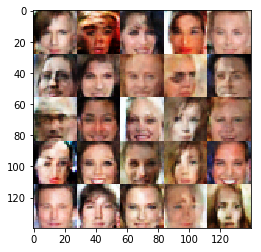

Epoch 1/1 Batch 5010... Discriminator Loss: 1.3007 ...  Generator Loss: 0.5026
Epoch 1/1 Batch 5020... Discriminator Loss: 1.0896 ...  Generator Loss: 0.7192
Epoch 1/1 Batch 5030... Discriminator Loss: 0.9986 ...  Generator Loss: 0.7009
Epoch 1/1 Batch 5040... Discriminator Loss: 0.9314 ...  Generator Loss: 1.0208
Epoch 1/1 Batch 5050... Discriminator Loss: 1.2023 ...  Generator Loss: 0.6332
Epoch 1/1 Batch 5060... Discriminator Loss: 1.1524 ...  Generator Loss: 1.3570
Epoch 1/1 Batch 5070... Discriminator Loss: 0.9403 ...  Generator Loss: 1.0937
Epoch 1/1 Batch 5080... Discriminator Loss: 1.0529 ...  Generator Loss: 1.2741
Epoch 1/1 Batch 5090... Discriminator Loss: 1.0206 ...  Generator Loss: 1.1600
Epoch 1/1 Batch 5100... Discriminator Loss: 1.1608 ...  Generator Loss: 1.0403


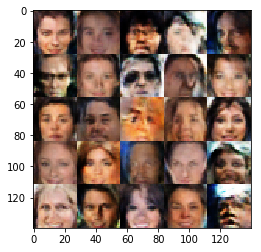

Epoch 1/1 Batch 5110... Discriminator Loss: 1.1000 ...  Generator Loss: 1.2041
Epoch 1/1 Batch 5120... Discriminator Loss: 0.8709 ...  Generator Loss: 0.9592
Epoch 1/1 Batch 5130... Discriminator Loss: 1.0370 ...  Generator Loss: 1.4553
Epoch 1/1 Batch 5140... Discriminator Loss: 1.0115 ...  Generator Loss: 0.8916
Epoch 1/1 Batch 5150... Discriminator Loss: 1.0310 ...  Generator Loss: 1.3050
Epoch 1/1 Batch 5160... Discriminator Loss: 0.9993 ...  Generator Loss: 1.0854
Epoch 1/1 Batch 5170... Discriminator Loss: 1.0006 ...  Generator Loss: 0.7138
Epoch 1/1 Batch 5180... Discriminator Loss: 1.0132 ...  Generator Loss: 0.6900
Epoch 1/1 Batch 5190... Discriminator Loss: 0.9866 ...  Generator Loss: 0.7894
Epoch 1/1 Batch 5200... Discriminator Loss: 1.2364 ...  Generator Loss: 0.7888


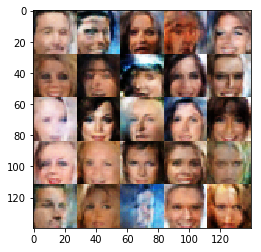

Epoch 1/1 Batch 5210... Discriminator Loss: 1.0686 ...  Generator Loss: 1.1434
Epoch 1/1 Batch 5220... Discriminator Loss: 1.0777 ...  Generator Loss: 1.1670
Epoch 1/1 Batch 5230... Discriminator Loss: 1.0874 ...  Generator Loss: 0.9838
Epoch 1/1 Batch 5240... Discriminator Loss: 0.9854 ...  Generator Loss: 0.8422
Epoch 1/1 Batch 5250... Discriminator Loss: 1.1379 ...  Generator Loss: 1.3786
Epoch 1/1 Batch 5260... Discriminator Loss: 0.9496 ...  Generator Loss: 0.8792
Epoch 1/1 Batch 5270... Discriminator Loss: 1.0186 ...  Generator Loss: 1.2602
Epoch 1/1 Batch 5280... Discriminator Loss: 0.9602 ...  Generator Loss: 1.3596
Epoch 1/1 Batch 5290... Discriminator Loss: 0.8998 ...  Generator Loss: 1.1978
Epoch 1/1 Batch 5300... Discriminator Loss: 0.9384 ...  Generator Loss: 1.3288


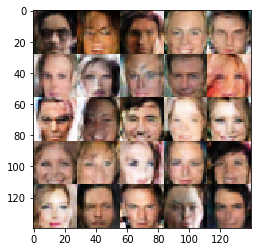

Epoch 1/1 Batch 5310... Discriminator Loss: 0.9674 ...  Generator Loss: 1.2124
Epoch 1/1 Batch 5320... Discriminator Loss: 0.9684 ...  Generator Loss: 0.9406
Epoch 1/1 Batch 5330... Discriminator Loss: 0.8626 ...  Generator Loss: 1.1081
Epoch 1/1 Batch 5340... Discriminator Loss: 0.8945 ...  Generator Loss: 0.9838
Epoch 1/1 Batch 5350... Discriminator Loss: 0.9762 ...  Generator Loss: 0.8527
Epoch 1/1 Batch 5360... Discriminator Loss: 1.0725 ...  Generator Loss: 0.7572
Epoch 1/1 Batch 5370... Discriminator Loss: 1.1841 ...  Generator Loss: 0.8184
Epoch 1/1 Batch 5380... Discriminator Loss: 1.2806 ...  Generator Loss: 0.5250
Epoch 1/1 Batch 5390... Discriminator Loss: 0.9825 ...  Generator Loss: 1.0328
Epoch 1/1 Batch 5400... Discriminator Loss: 1.0181 ...  Generator Loss: 0.9193


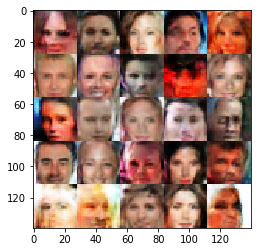

Epoch 1/1 Batch 5410... Discriminator Loss: 0.9981 ...  Generator Loss: 1.4751
Epoch 1/1 Batch 5420... Discriminator Loss: 0.9541 ...  Generator Loss: 0.7810
Epoch 1/1 Batch 5430... Discriminator Loss: 1.2710 ...  Generator Loss: 0.5285
Epoch 1/1 Batch 5440... Discriminator Loss: 0.9408 ...  Generator Loss: 1.1525
Epoch 1/1 Batch 5450... Discriminator Loss: 1.0273 ...  Generator Loss: 0.8978
Epoch 1/1 Batch 5460... Discriminator Loss: 0.9990 ...  Generator Loss: 1.3199
Epoch 1/1 Batch 5470... Discriminator Loss: 1.1685 ...  Generator Loss: 0.9639
Epoch 1/1 Batch 5480... Discriminator Loss: 0.9325 ...  Generator Loss: 1.4320
Epoch 1/1 Batch 5490... Discriminator Loss: 1.2684 ...  Generator Loss: 0.5855
Epoch 1/1 Batch 5500... Discriminator Loss: 1.0594 ...  Generator Loss: 0.8119


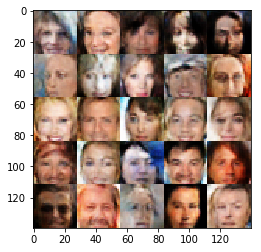

Epoch 1/1 Batch 5510... Discriminator Loss: 0.8140 ...  Generator Loss: 0.7900
Epoch 1/1 Batch 5520... Discriminator Loss: 1.0496 ...  Generator Loss: 1.1237
Epoch 1/1 Batch 5530... Discriminator Loss: 1.1856 ...  Generator Loss: 0.6759
Epoch 1/1 Batch 5540... Discriminator Loss: 1.2342 ...  Generator Loss: 0.5467
Epoch 1/1 Batch 5550... Discriminator Loss: 0.8407 ...  Generator Loss: 1.3523
Epoch 1/1 Batch 5560... Discriminator Loss: 0.9710 ...  Generator Loss: 1.5316
Epoch 1/1 Batch 5570... Discriminator Loss: 1.0472 ...  Generator Loss: 1.3213
Epoch 1/1 Batch 5580... Discriminator Loss: 1.1372 ...  Generator Loss: 0.8176
Epoch 1/1 Batch 5590... Discriminator Loss: 1.0075 ...  Generator Loss: 1.2735
Epoch 1/1 Batch 5600... Discriminator Loss: 1.0034 ...  Generator Loss: 0.6843


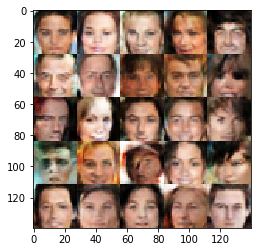

Epoch 1/1 Batch 5610... Discriminator Loss: 1.0766 ...  Generator Loss: 1.0497
Epoch 1/1 Batch 5620... Discriminator Loss: 0.9864 ...  Generator Loss: 0.7692
Epoch 1/1 Batch 5630... Discriminator Loss: 1.0786 ...  Generator Loss: 1.3939
Epoch 1/1 Batch 5640... Discriminator Loss: 1.0194 ...  Generator Loss: 1.0272
Epoch 1/1 Batch 5650... Discriminator Loss: 1.0837 ...  Generator Loss: 0.8999
Epoch 1/1 Batch 5660... Discriminator Loss: 0.9006 ...  Generator Loss: 1.4884
Epoch 1/1 Batch 5670... Discriminator Loss: 1.0244 ...  Generator Loss: 0.7229
Epoch 1/1 Batch 5680... Discriminator Loss: 0.9961 ...  Generator Loss: 0.8153
Epoch 1/1 Batch 5690... Discriminator Loss: 1.1193 ...  Generator Loss: 1.8384
Epoch 1/1 Batch 5700... Discriminator Loss: 0.9726 ...  Generator Loss: 1.1468


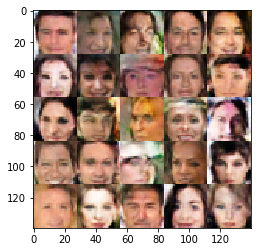

Epoch 1/1 Batch 5710... Discriminator Loss: 1.0965 ...  Generator Loss: 1.5374
Epoch 1/1 Batch 5720... Discriminator Loss: 0.8496 ...  Generator Loss: 1.3554
Epoch 1/1 Batch 5730... Discriminator Loss: 1.1275 ...  Generator Loss: 0.6067
Epoch 1/1 Batch 5740... Discriminator Loss: 1.3423 ...  Generator Loss: 0.6829
Epoch 1/1 Batch 5750... Discriminator Loss: 1.2393 ...  Generator Loss: 0.6431
Epoch 1/1 Batch 5760... Discriminator Loss: 1.1434 ...  Generator Loss: 1.0911
Epoch 1/1 Batch 5770... Discriminator Loss: 1.1485 ...  Generator Loss: 0.6377
Epoch 1/1 Batch 5780... Discriminator Loss: 0.7919 ...  Generator Loss: 1.1763
Epoch 1/1 Batch 5790... Discriminator Loss: 1.0073 ...  Generator Loss: 0.9330
Epoch 1/1 Batch 5800... Discriminator Loss: 1.0391 ...  Generator Loss: 1.3277


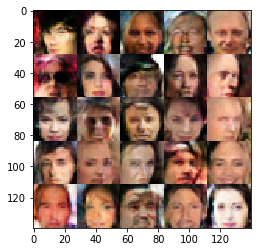

Epoch 1/1 Batch 5810... Discriminator Loss: 1.1533 ...  Generator Loss: 1.5563
Epoch 1/1 Batch 5820... Discriminator Loss: 1.0337 ...  Generator Loss: 0.9778
Epoch 1/1 Batch 5830... Discriminator Loss: 1.0229 ...  Generator Loss: 1.1164
Epoch 1/1 Batch 5840... Discriminator Loss: 1.0084 ...  Generator Loss: 0.8085
Epoch 1/1 Batch 5850... Discriminator Loss: 0.8390 ...  Generator Loss: 0.7550
Epoch 1/1 Batch 5860... Discriminator Loss: 0.8838 ...  Generator Loss: 0.7047
Epoch 1/1 Batch 5870... Discriminator Loss: 0.9363 ...  Generator Loss: 1.1130
Epoch 1/1 Batch 5880... Discriminator Loss: 1.0730 ...  Generator Loss: 0.8330
Epoch 1/1 Batch 5890... Discriminator Loss: 0.9183 ...  Generator Loss: 0.6006
Epoch 1/1 Batch 5900... Discriminator Loss: 1.1794 ...  Generator Loss: 0.7537


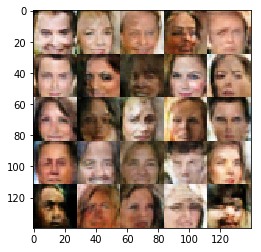

Epoch 1/1 Batch 5910... Discriminator Loss: 0.9493 ...  Generator Loss: 0.5934
Epoch 1/1 Batch 5920... Discriminator Loss: 1.0837 ...  Generator Loss: 0.7456
Epoch 1/1 Batch 5930... Discriminator Loss: 0.9156 ...  Generator Loss: 1.5362
Epoch 1/1 Batch 5940... Discriminator Loss: 0.8597 ...  Generator Loss: 1.1182
Epoch 1/1 Batch 5950... Discriminator Loss: 1.1879 ...  Generator Loss: 1.5760
Epoch 1/1 Batch 5960... Discriminator Loss: 0.9282 ...  Generator Loss: 1.5710
Epoch 1/1 Batch 5970... Discriminator Loss: 0.9209 ...  Generator Loss: 0.8784
Epoch 1/1 Batch 5980... Discriminator Loss: 1.0368 ...  Generator Loss: 1.1255
Epoch 1/1 Batch 5990... Discriminator Loss: 1.1221 ...  Generator Loss: 0.8082
Epoch 1/1 Batch 6000... Discriminator Loss: 0.8541 ...  Generator Loss: 1.2023


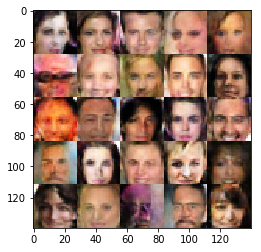

Epoch 1/1 Batch 6010... Discriminator Loss: 1.0948 ...  Generator Loss: 1.8344
Epoch 1/1 Batch 6020... Discriminator Loss: 0.9895 ...  Generator Loss: 0.7890
Epoch 1/1 Batch 6030... Discriminator Loss: 1.0855 ...  Generator Loss: 0.6542
Epoch 1/1 Batch 6040... Discriminator Loss: 1.1466 ...  Generator Loss: 1.8211
Epoch 1/1 Batch 6050... Discriminator Loss: 0.9050 ...  Generator Loss: 0.8807
Epoch 1/1 Batch 6060... Discriminator Loss: 1.1080 ...  Generator Loss: 1.6012
Epoch 1/1 Batch 6070... Discriminator Loss: 0.9090 ...  Generator Loss: 1.0663
Epoch 1/1 Batch 6080... Discriminator Loss: 1.0784 ...  Generator Loss: 0.9645
Epoch 1/1 Batch 6090... Discriminator Loss: 0.9529 ...  Generator Loss: 1.0206
Epoch 1/1 Batch 6100... Discriminator Loss: 1.1379 ...  Generator Loss: 0.7380


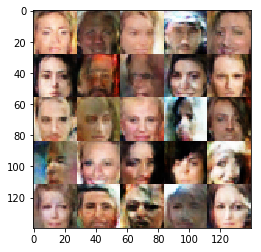

Epoch 1/1 Batch 6110... Discriminator Loss: 0.8188 ...  Generator Loss: 1.1358
Epoch 1/1 Batch 6120... Discriminator Loss: 0.8813 ...  Generator Loss: 1.5984
Epoch 1/1 Batch 6130... Discriminator Loss: 0.9213 ...  Generator Loss: 0.9401
Epoch 1/1 Batch 6140... Discriminator Loss: 0.7842 ...  Generator Loss: 1.1208
Epoch 1/1 Batch 6150... Discriminator Loss: 1.0722 ...  Generator Loss: 1.1793
Epoch 1/1 Batch 6160... Discriminator Loss: 0.9061 ...  Generator Loss: 0.6541
Epoch 1/1 Batch 6170... Discriminator Loss: 1.2442 ...  Generator Loss: 0.5757
Epoch 1/1 Batch 6180... Discriminator Loss: 1.0057 ...  Generator Loss: 1.2543
Epoch 1/1 Batch 6190... Discriminator Loss: 0.9414 ...  Generator Loss: 1.0360
Epoch 1/1 Batch 6200... Discriminator Loss: 1.0693 ...  Generator Loss: 0.9264


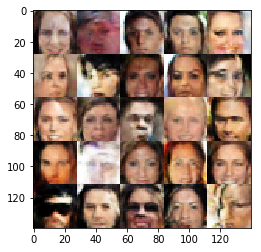

Epoch 1/1 Batch 6210... Discriminator Loss: 0.9395 ...  Generator Loss: 1.0646
Epoch 1/1 Batch 6220... Discriminator Loss: 0.8768 ...  Generator Loss: 1.1758
Epoch 1/1 Batch 6230... Discriminator Loss: 0.9988 ...  Generator Loss: 1.2729
Epoch 1/1 Batch 6240... Discriminator Loss: 0.8862 ...  Generator Loss: 1.0835
Epoch 1/1 Batch 6250... Discriminator Loss: 1.2184 ...  Generator Loss: 0.5449
Epoch 1/1 Batch 6260... Discriminator Loss: 0.9691 ...  Generator Loss: 1.5632
Epoch 1/1 Batch 6270... Discriminator Loss: 0.8786 ...  Generator Loss: 1.2439
Epoch 1/1 Batch 6280... Discriminator Loss: 1.2250 ...  Generator Loss: 1.9142
Epoch 1/1 Batch 6290... Discriminator Loss: 1.0097 ...  Generator Loss: 0.8483
Epoch 1/1 Batch 6300... Discriminator Loss: 0.8843 ...  Generator Loss: 0.9675


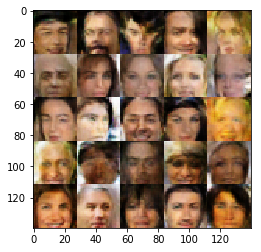

Epoch 1/1 Batch 6310... Discriminator Loss: 0.7016 ...  Generator Loss: 1.1319
Epoch 1/1 Batch 6320... Discriminator Loss: 1.1369 ...  Generator Loss: 0.5742
Epoch 1/1 Batch 6330... Discriminator Loss: 0.7616 ...  Generator Loss: 1.1242


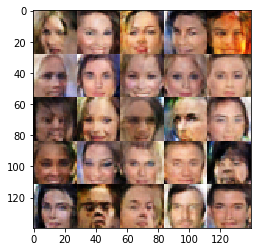

In [73]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.